In [1]:
!pip install nlp
!pip install transformers
!pip install sentencepiece
!pip install simpletransformers
!pip install umap-learn
!pip install hdbscan
!pip install sentence_transformers
!pip install nltk
!pip install allennlp

     |████████████████████████████████| 1.7MB 15.6MB/s 
     |████████████████████████████████| 245kB 57.2MB/s 
     |████████████████████████████████| 2.0MB 10.2MB/s 
     |████████████████████████████████| 3.2MB 53.9MB/s 
     |████████████████████████████████| 890kB 44.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=19dbe12c66678a1c40623e83f180632f980b4172705328a227b9a986c2aa1418
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 1.2MB 19.4MB/s 
     |████████████████████████████████| 215kB 17.4MB/s 
     |████████████████████████████████| 7.0MB 53.4MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 194kB 52.4MB/s 
     |████████████████████████████████| 317kB 50.5MB/s 
     |███████████████████████████

     |████████████████████████████████| 6.4MB 16.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311677 sha256=30b4158ac95b04d2d5056c42278ea75f5ad74742d617aa44eec120927bf75e5e
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan
     |████████████████████████████████| 81kB 9.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.3-cp37-none-any.whl size=114277 sha256=b052167aae12bc6d4022e96dd1c9da7bcba69b7353566bffb31ef46db9075dcd
  Stored in directory: /root/.cache/pip/wheels/c8/0d/fa/4e28cf045da4781344e7972befb2fdf306051b225bfc290187
Successfully built sentence-transformers
     |████████████████████████████████| 593kB 21.4MB/s 
     |████████████████████████████████| 12.8MB 209kB/s 
     |████████████████

In [3]:
import torch
import transformers
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from transformers import T5Model, T5Tokenizer, T5EncoderModel, T5TokenizerFast, T5ForConditionalGeneration
import umap.umap_ as umap
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
import hdbscan
import sentence_transformers

# Loading dataset

In [4]:
newsgroups_train = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
dataset = newsgroups_train.data
original_labels = newsgroups_train.target

In [5]:
df = pd.DataFrame(dataset, columns=['text']) 
df['original_labels'] = original_labels
df = df[df.text != '']
df = df.reset_index()
df = df

## Rimozione stop words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

texts = df.text
output = []
for i, text in enumerate(texts):
  print(i)
  text_tokens = word_tokenize(text)
  reduced_tokens = [word for word in text_tokens if not word in stopwords.words()]
  reduced_tokens = [word for word in reduced_tokens if (len(word) > 3 and len(word) < 15)]
  filtered_sentence = (" ").join(reduced_tokens)
  output.append(filtered_sentence)

df.loc[:, 'text_reduced'] = output

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd drive/MyDrive/Tesi/

/content/drive/MyDrive/Tesi


In [ ]:
import pandas as pd
import numpy as np

f = open('gov_uk_10000.json',) 
df = pd.read_json(f)
df = df[df.text != '']
df = df.reset_index()

## Salvataggio dataframe

In [ ]:
df.to_pickle("20newsgroup_2000_reduced.pkl") 

In [ ]:
df = pd.read_pickle("20newsgroup_2000_reduced.pkl")

# Embedding

## T5 allenato a predire i titoli


In [ ]:
from transformers import T5Model, T5Tokenizer, T5EncoderModel, T5TokenizerFast, T5ForConditionalGeneration

tokenizer = T5TokenizerFast.from_pretrained('google/t5-large-ssm-nq')
model_encode = T5EncoderModel.from_pretrained('google/t5-large-ssm-nq', output_hidden_states = True).to(device)
model_encode.eval()

Some weights of the model checkpoint at google/t5-large-ssm-nq were not used when initializing T5EncoderModel: ['decoder.embed_tokens.weight', 'decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.0.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.0.layer.2.DenseReluDense.wi.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.layer_norm.weight', 'decoder.block.1.layer.0.SelfAttention.q.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.0.SelfAttention

T5EncoderModel(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (dropout): Dr

In [ ]:
input_ids = tokenizer("I will go to school tomorrow", return_tensors="pt", padding=True, truncation=True).input_ids

In [ ]:
df.loc[0].text

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [ ]:
input_ids

tensor([[  27,   56,  281,   12,  496, 5721,    1]])

In [ ]:
tokenizer.convert_ids_to_tokens(input_ids[0])

['▁I', '▁will', '▁go', '▁to', '▁school', '▁tomorrow', '</s>']

In [ ]:
texts = "get_title: " + df['text'] + "</s>"
texts = texts.tolist()

In [ ]:
input_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True).input_ids
tokens = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

In [ ]:

batch_size = 100    
token_embeddings = []

for i in range(0, len(df), batch_size):
  print(str(i) + "/" + str(len(df)))
  with torch.no_grad():    
    result = model_encode(input_ids=input_ids[i:i+batch_size]).last_hidden_state
    token_embeddings.append(result)

token_embeddings = torch.cat(token_embeddings)
token_embeddings.shape

In [ ]:
torch.save(token_embeddings, './tokens/token_embeddings_trained_20NewsGroup_2000.pt') 

In [ ]:
token_embeddings = torch.load('./tokens/token_embeddings_trained_20NewsGroup_2000.pt')

In [ ]:
documents_embeddings = torch.mean(token_embeddings, dim=1)
documents_embeddings.shape

torch.Size([2000, 512])

## T5 large

## Sentence embedding con BERT


In [ ]:
from sentence_transformers import SentenceTransformer, models
from torch import nn

word_embedding_model = models.Transformer('tmp/distiluse-base-multilingual-cased-v2_newsgroup')
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

404 Client Error: Not Found for url: https://huggingface.co/tmp/distiluse-base-multilingual-cased-v2_newsgroup/resolve/main/config.json


OSError: ignored

In [8]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import models
model2 = SentenceTransformer('distilbert-base-uncased')
#model2 = SentenceTransformer('tmp/sentence_bert-large-uncased_20newsgroup_continue')
#model2 = SentenceTransformer('sentence-transformers/bert-base-nli-stsb-mean-tokens')
#model2 = SentenceTransformer('stsb-roberta-large')
#model2 = SentenceTransformer('distiluse-base-multilingual-cased-v2')
#model2 = SentenceTransformer('bert-base-multilingual-cased')
#model2 = SentenceTransformer('sentence-transformers/distilbert-base-nli-stsb-mean-tokens')  abbastanza bene
#model = SentenceTransformer('stsb-distilbert-base')
#model2 = SentenceTransformer(modules=[word_embedding_model, pooling_model])

Exception when trying to download http://sbert.net/models/distilbert-base-uncased.zip. Response 404
SentenceTransformer-Model http://sbert.net/models/distilbert-base-uncased.zip not found. Try to create it from scratch
Try to create Transformer Model distilbert-base-uncased with mean pooling


Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [9]:
documents = df.text.tolist()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
train_corpus = [' '.join(simple_preprocess(strip_tags(doc), deacc=True)) for doc in documents]

vectorizer = CountVectorizer()
doc_word_counts = vectorizer.fit_transform(train_corpus)
words = vectorizer.get_feature_names()
word_counts = np.array(np.sum(doc_word_counts, axis=0).tolist()[0])
vocab_inds = np.where(word_counts > 50)[0]
vocab = [words[ind] for ind in vocab_inds]

In [11]:
from sklearn.preprocessing import normalize

def _l2_normalize(vectors):
  if vectors.ndim == 2:
      return torch.tensor(normalize(vectors))
  else:
      return torch.tensor(normalize(vectors.reshape(1, -1))[0])

In [12]:
word_indexes = dict(zip(vocab, range(len(vocab))))
token_embeddings = torch.tensor(_l2_normalize(np.array(model2.encode(vocab))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [13]:
train_corpus = train_corpus
batch_size = 500
document_vectors = []

current = 0
batches = int(len(train_corpus) / batch_size)
extra = len(train_corpus) % batch_size

for ind in range(0, batches):
    document_vectors.append(model2.encode(documents[current:current + batch_size]))
    current += batch_size

if extra > 0:
    document_vectors.append(model2.encode(documents[current:current + extra]))

documents_embeddings = torch.tensor(_l2_normalize(np.array(np.vstack(document_vectors))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


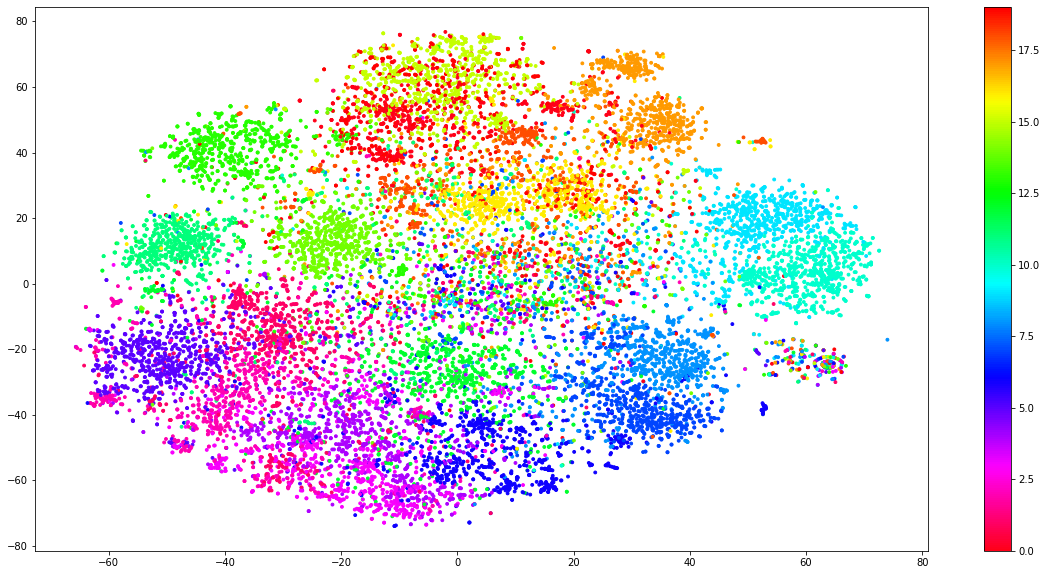

In [ ]:
# tmp/sentence_bert-large-uncased_20newsgroup_continue
visualize_tsne(documents_embeddings, labels=df.original_labels)

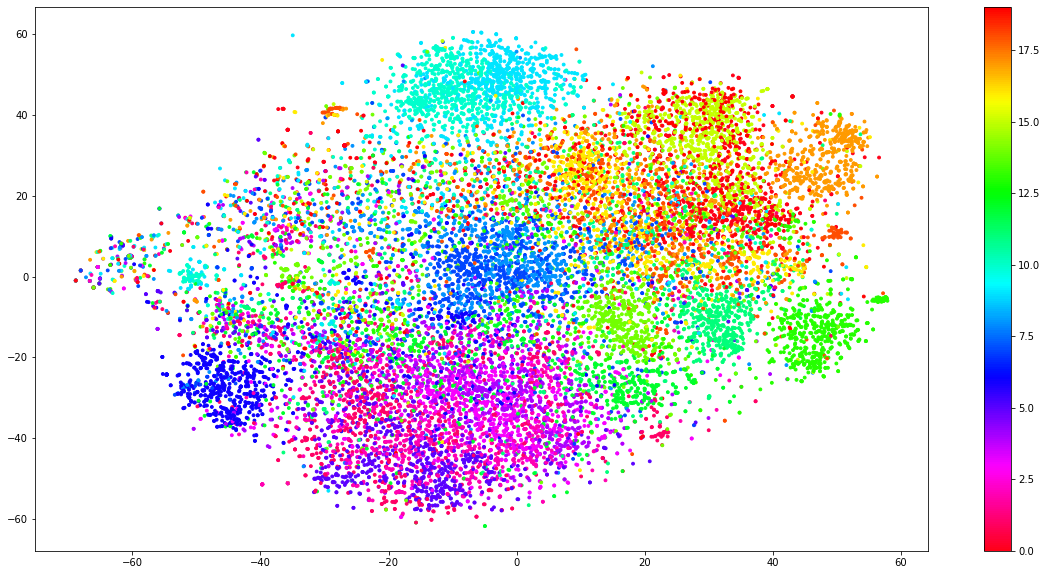

In [ ]:
# tmp/distiluse-base-multilingual-cased-v2_newsgroup
visualize_tsne(documents_embeddings, labels=df.original_labels)

In [ ]:
torch.save(documents_embeddings, "./tokens/documents_embedding_20newsgorupcomplete_sentencetransformer_distiluse-base-multilingual-cased-v2")

In [ ]:
documents_embeddings = torch.load("./tokens/documents_embedding_20newsgorupcomplete_sentencetransformer_distiluse-base-multilingual-cased-v2")

In [ ]:
# Embedding di tutti i documenti

In [ ]:
visualize_tsne_cuda(documents_embeddings, labels=df.original_labels)

OSError: ignored

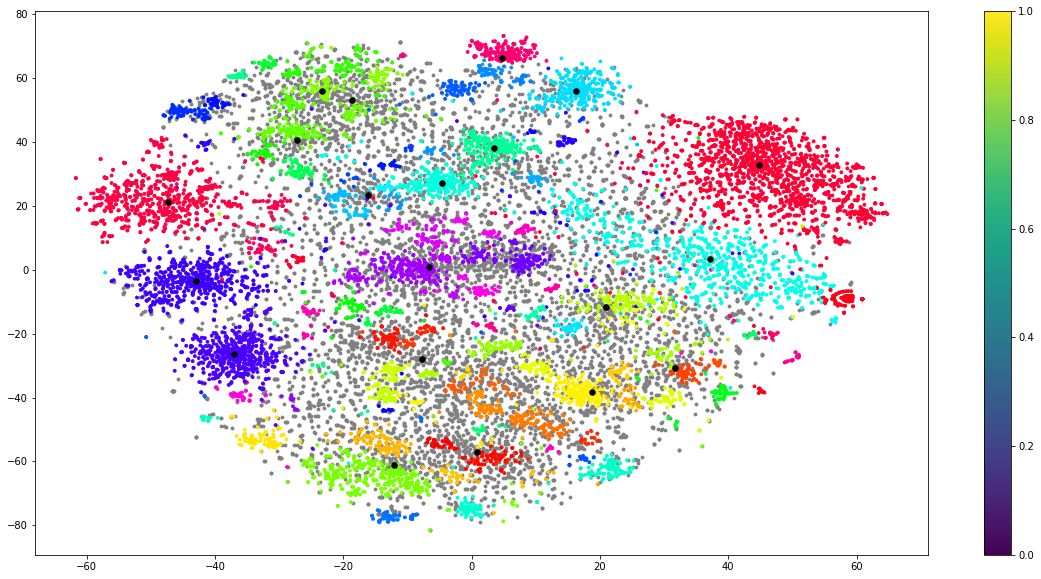

In [ ]:
visualize_tsne(documents_embeddings, labels=df.umap_hdbscan, words=topic_vectors_reduced)

In [ ]:
# Embedding di 6000 documenti

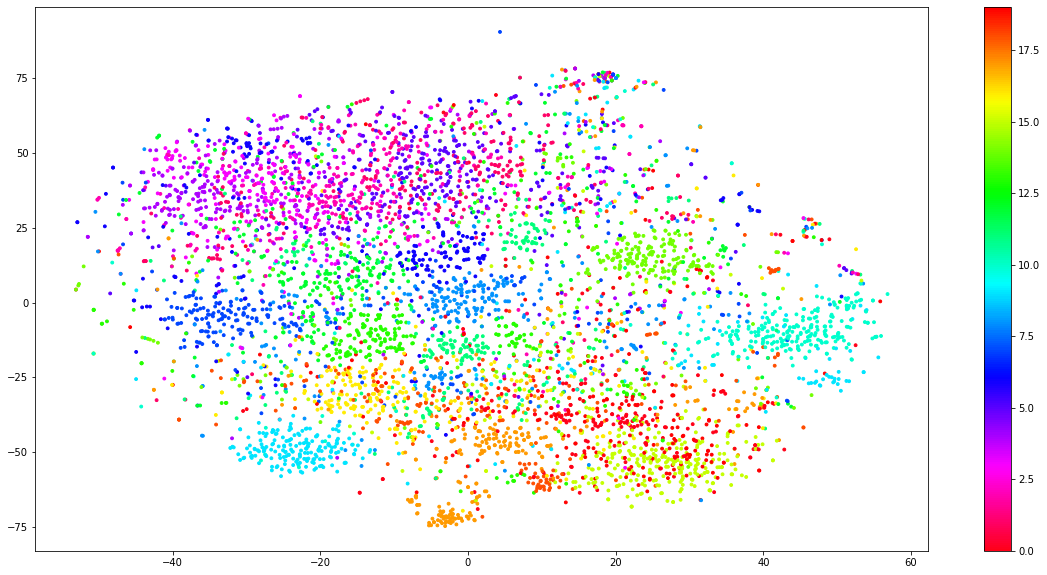

In [ ]:
visualize_tsne(documents_embeddings, labels=df.original_labels)

## Sentence embedding con BERT allenato

In [ ]:
from transformers import (
    BertConfig,
    BertForMaskedLM,
    BertTokenizer,
    AdamW,
    DataCollatorForLanguageModeling
)
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import sentence_transformers

In [ ]:
class BertPred(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertForMaskedLM.from_pretrained('bert-base-uncased')

    def forward(self, input_ids, labels=None):
        return self.bert(input_ids=input_ids,labels=labels)

new_model = BertPred()
new_model.load_state_dict(torch.load('saved.bin'))
new_model.eval()

In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.models import Pooling

In [ ]:
pooling_model = Pooling(new_model.get_word_embedding_dimension())

model = SentenceTransformer(modules=[new_model, pooling_model])

ModuleAttributeError: ignored

## Sentence embedding non allenato

https://www.sbert.net/examples/applications/computing-embeddings/README.html#storing-loading-embeddings

In [ ]:
documents = df.text.tolist()

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

def mean_pooling(model_output, attention_mask):
  token_embeddings = model_output
  input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
  sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
  sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
  return sum_embeddings / sum_mask

In [ ]:
def max_pooling(model_output, attention_mask):
  token_embeddings = model_output[0] 
  input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
  token_embeddings[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
  max_over_time = torch.max(token_embeddings, 1)[0]
  return max_over_time

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
train_corpus = [' '.join(simple_preprocess(strip_tags(doc), deacc=True)) for doc in documents]

vectorizer = CountVectorizer()
doc_word_counts = vectorizer.fit_transform(train_corpus)
words = vectorizer.get_feature_names()
word_counts = np.array(np.sum(doc_word_counts, axis=0).tolist()[0])
vocab_inds = np.where(word_counts > 50)[0]
vocab = [words[ind] for ind in vocab_inds]

In [ ]:
from sklearn.preprocessing import normalize

def _l2_normalize(vectors):
  if vectors.ndim == 2:
      return torch.tensor(normalize(vectors))
  else:
      return torch.tensor(normalize(vectors.reshape(1, -1))[0])

In [ ]:
from transformers import T5Model, T5Tokenizer, T5EncoderModel, T5TokenizerFast, T5ForConditionalGeneration, AutoTokenizer, AutoModel

model = T5EncoderModel.from_pretrained('t5-small', output_hidden_states = True)
tokenizer = T5TokenizerFast.from_pretrained('t5-small')

#model = AutoModel.from_pretrained("sentence-transformers/bert-base-nli-mean-tokens")
#tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/bert-base-nli-mean-tokens")

#model = AutoModel.from_pretrained("bert-base-uncased")
#tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def encode(documents):
  tokens = tokenizer(documents, return_tensors="pt", padding=True, truncation=True, max_length=128)
  input_ids = tokens.input_ids

  batch_size = 100    
  token_embeddings = []
  masks = tokens['attention_mask']

  for i in range(0, len(documents), batch_size):
    print(str(i) + "/" + str(len(df)))
    with torch.no_grad():    
      result = model(input_ids=input_ids[i:i+batch_size], attention_mask=masks[i:i+batch_size]).last_hidden_state
      token_embeddings.append(result)
  token_embeddings = torch.cat(token_embeddings)
  token_embeddings = torch.tensor(_l2_normalize(np.array(mean_pooling(token_embeddings, masks))))
  return token_embeddings

Some weights of the model checkpoint at t5-small were not used when initializing T5EncoderModel: ['decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.0.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.relative_attention_bias.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.0.layer.2.DenseReluDense.wi.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.layer_norm.weight', 'decoder.block.1.layer.0.SelfAttention.q.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
token_embeddings = encode(vocab)

0/5876
100/5876
200/5876
300/5876
400/5876
500/5876
600/5876
700/5876
800/5876
900/5876
1000/5876
1100/5876
1200/5876
1300/5876
1400/5876
1500/5876
1600/5876
1700/5876
1800/5876
1900/5876
2000/5876
2100/5876
2200/5876
2300/5876


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
documents_embeddings = encode(documents)

0/5876
100/5876
200/5876
300/5876
400/5876
500/5876
600/5876
700/5876
800/5876
900/5876
1000/5876
1100/5876
1200/5876
1300/5876
1400/5876
1500/5876
1600/5876
1700/5876
1800/5876
1900/5876
2000/5876
2100/5876
2200/5876
2300/5876
2400/5876
2500/5876
2600/5876
2700/5876
2800/5876
2900/5876
3000/5876
3100/5876
3200/5876
3300/5876
3400/5876
3500/5876
3600/5876
3700/5876
3800/5876
3900/5876
4000/5876
4100/5876
4200/5876
4300/5876
4400/5876
4500/5876
4600/5876
4700/5876
4800/5876
4900/5876
5000/5876
5100/5876
5200/5876
5300/5876
5400/5876
5500/5876
5600/5876
5700/5876
5800/5876


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
torch.save(documents_embeddings, "./tokens/sentence_embedding_complete_bert-base-uncased")

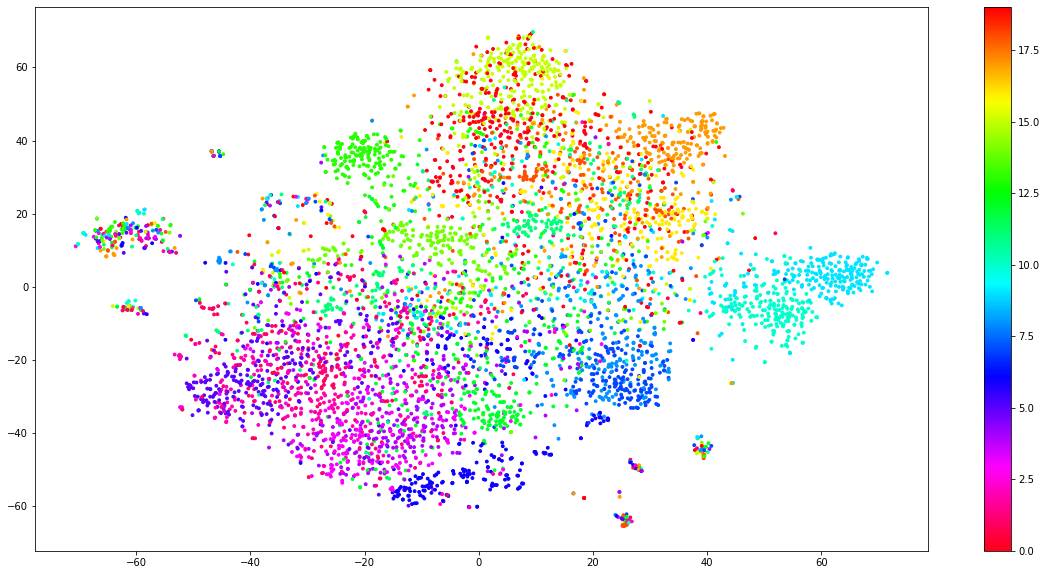

In [ ]:
# bert-base-uncased 6000 documenti
visualize_tsne(documents_embeddings, labels=df.original_labels)

## Sentence embedding con T5

In [ ]:
# se non va provare ad aggiungere get_title:
documents = df.text.tolist()

In [ ]:
documents = documents[0:6000]

In [ ]:
with torch.no_grad():    
  t = tokenizer(a, return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)
  m = model(t.input_ids).last_hidden_state

In [ ]:
documents

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [ ]:

tokens = tokenizer('I am sure', return_tensors="pt", padding=True, truncation=True, max_length=256)
input_ids = tokens.input_ids.to(device)

attention_mask = tokens['attention_mask'].to(device)

with torch.no_grad():    
  mask_batch = attention_mask
  token_embeddings = model(input_ids=input_ids, attention_mask=mask_batch).last_hidden_state
  input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
  sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
  sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
  out = sum_embeddings / sum_mask

In [ ]:
a = torch.mean(token_embeddings, 1)

In [ ]:
a == out

tensor([[True, True, True,  ..., True, True, True]], device='cuda:0')

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

def mean_pooling(model_output, attention_mask, mode="documents"):
  token_embeddings = model_output
  input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
  sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
  sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
  return sum_embeddings / sum_mask

In [ ]:
def max_pooling(model_output, attention_mask):
  token_embeddings = model_output[0] 
  input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
  token_embeddings[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
  max_over_time = torch.max(token_embeddings, 1)[0]
  return max_over_time

In [ ]:
documents[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [ ]:
vocab

['are', 'as', 'be', 'for', 'have', 'not', 'on', 'or', 'this', 'with', 'you']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags

train_corpus = [' '.join(simple_preprocess(strip_tags(doc), deacc=True)) for doc in documents]
vectorizer = CountVectorizer()
doc_word_counts = vectorizer.fit_transform(train_corpus)
words = vectorizer.get_feature_names()
word_counts = np.array(np.sum(doc_word_counts, axis=0).tolist()[0])
vocab_inds = np.where(word_counts > 50)[0]
vocab = [words[ind] for ind in vocab_inds]

In [ ]:
from sklearn.preprocessing import normalize

def _l2_normalize(vectors):
  if vectors.ndim == 2:
      return torch.tensor(normalize(vectors))
  else:
      return torch.tensor(normalize(vectors.reshape(1, -1))[0])

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"


In [ ]:
from transformers import T5Model, T5Tokenizer, T5EncoderModel, T5TokenizerFast, T5ForConditionalGeneration, AutoTokenizer, AutoModel, AutoModelForSeq2SeqLM

#model = T5EncoderModel.from_pretrained('google/t5-large-ssm-nq', output_hidden_states = True).to(device)
#tokenizer = T5Tokenizer.from_pretrained('google/t5-large-ssm-nq')

model = AutoModel.from_pretrained("tmp/distilbert-base-uncased_20newsgroup_test2", output_hidden_states = True).to(device)
tokenizer = AutoTokenizer.from_pretrained("tmp/distilbert-base-uncased_20newsgroup_test2")

#model = AutoModel.from_pretrained("bert-base-uncased", output_hidden_states = True).to(device)
#tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

#model = AutoModel.from_pretrained("tmp/distilbert-base-uncased_20newsgroup").to(device)
#tokenizer = AutoTokenizer.from_pretrained("tmp/distilbert-base-uncased_20newsgroup")

#model = AutoModel.from_pretrained("distilbert-base-uncased").to(device)
#tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


#model = AutoModel.from_pretrained("sentence-transformers/bert-base-nli-mean-tokens")
#tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/bert-base-nli-mean-tokens")

#model = T5EncoderModel.from_pretrained('outputs', output_hidden_states = True).to(device)
#tokenizer = T5Tokenizer.from_pretrained('outputs')

#model = T5EncoderModel.from_pretrained('t5-small', output_hidden_states = True).to(device)
#tokenizer = T5Tokenizer.from_pretrained('t5-small')

#model = T5EncoderModel.from_pretrained('t5-base', output_hidden_states = True).to(device)
#tokenizer = T5Tokenizer.from_pretrained('t5-base')

model.eval()

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

In [ ]:
a = "your own word embeddings."
tokenizer.tokenize(a)

['your', 'own', 'word', 'em', '##bed', '##ding', '##s', '.']

In [ ]:
t = tokenizer(a, return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)

In [ ]:
tokenizer.convert_ids_to_tokens(t.input_ids[0])

['[CLS]', 'your', 'own', 'word', 'em', '##bed', '##ding', '##s', '.', '[SEP]']

In [ ]:
result = model(input_ids=t.input_ids).last_hidden_state

In [ ]:
word_emb = []
words = []

for 

In [ ]:
result.shape

torch.Size([1, 10, 768])

In [ ]:
a = "my dog is eating pizza. I'm leaving new york"
t = tokenizer(a, return_tensors="pt", padding=True, truncation=True, max_length=256)

In [ ]:
tokenizer.tokenize(a)

['my', 'dog', 'is', 'eating', 'pizza']

In [ ]:
tokenizer.convert_ids_to_tokens(t.input_ids[0])

['[CLS]',
 'my',
 'dog',
 'is',
 'eating',
 'pizza',
 '.',
 'i',
 "'",
 'm',
 'leaving',
 'new',
 'york',
 '[SEP]']

In [ ]:
words_ids = []
words_emb = []

def encode2(s):
  documents_embeddings = []
  for n,i in enumerate(s):
    print(str(n) + "/" + str(len(s)))
    tokens = tokenizer(i, return_tensors="pt", padding=True, truncation=True, max_length=256)
    input_ids = tokens.input_ids.to(device)  
    masks = tokens['attention_mask'].to(device)

    with torch.no_grad():    
      result = model(input_ids=input_ids).last_hidden_state
      result = result[0].to('cpu')
      documents_embeddings.append(torch.mean(result, 0).cpu())
      input_ids = input_ids[0].to('cpu')

      for j, h in enumerate(input_ids):
        words_ids.append(h)
        words_emb.append(result[j])
    
  documents_embeddings = torch.stack(documents_embeddings)
    
  return documents_embeddings

In [ ]:
tokenizer.add_tokens(vocab)

4221

In [ ]:
tokens = tokenizer(vocab, return_tensors="pt", padding=True, truncation=True, max_length=256)

KeyboardInterrupt: ignored

In [ ]:
def encodeBERT(s):
  
  tokens = tokenizer(s, return_tensors="pt", padding=True, truncation=True, max_length=256)
  input_ids = tokens.input_ids.to(device)

  batch_size = 100    
  documents_embeddings = []
  masks = tokens['attention_mask'].to(device)

  for i in range(0, len(s), batch_size):
    print(str(i) + "/" + str(len(s)))
    with torch.no_grad():    
      mask_batch = masks[i:i+batch_size]
      result = model(input_ids=input_ids[i:i+batch_size], attention_mask=mask_batch)[2]
      token_vecs = result[-2][0]
      # Calculate the average of all 22 token vectors.
      sentence_embedding = torch.mean(token_vecs, dim=1)
      documents_embeddings.append((sentence_embedding).cpu())

  documents_embeddings = torch.stack(documents_embeddings)
  
  return torch.tensor(_l2_normalize(documents_embeddings))

In [ ]:
def encode(s):
  
  tokens = tokenizer(s, return_tensors="pt", padding=True, truncation=True, max_length=256)
  input_ids = tokens.input_ids.to(device)

  batch_size = 100    
  documents_embeddings = []
  masks = tokens['attention_mask'].to(device)

  for i in range(0, len(s), batch_size):
    print(str(i) + "/" + str(len(s)))
    with torch.no_grad():    
      mask_batch = masks[i:i+batch_size]
      result = model(input_ids=input_ids[i:i+batch_size], attention_mask=mask_batch).last_hidden_state
      documents_embeddings.append(mean_pooling(result, mask_batch).cpu())

  documents_embeddings = torch.cat(documents_embeddings)
  
  return torch.tensor(_l2_normalize(documents_embeddings))

In [ ]:
token_embeddings = encode(vocab)

KeyboardInterrupt: ignored

In [ ]:
vocab

['the']

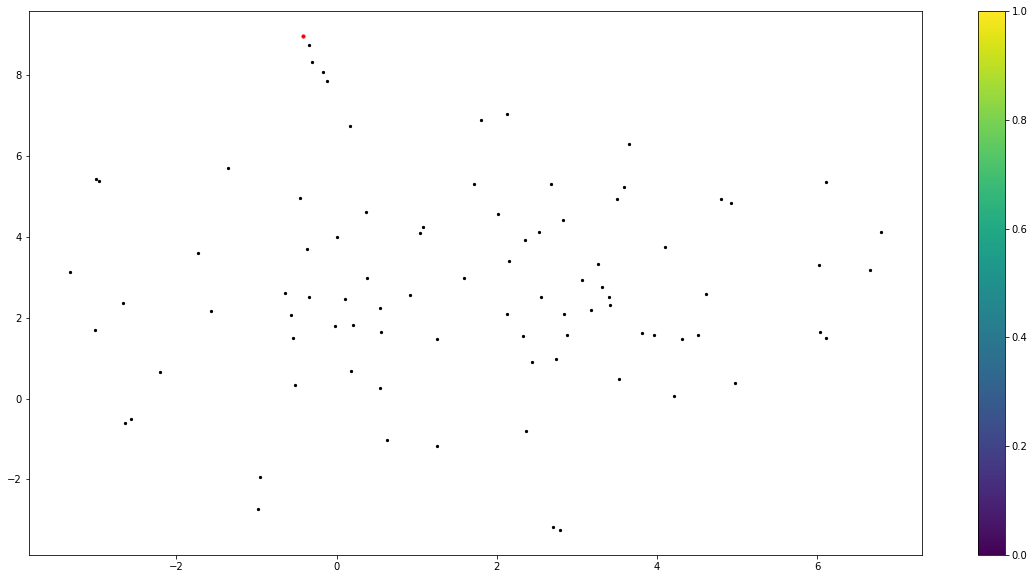

In [ ]:
visualize_tsne(documents_embeddings, words=token_embeddings)

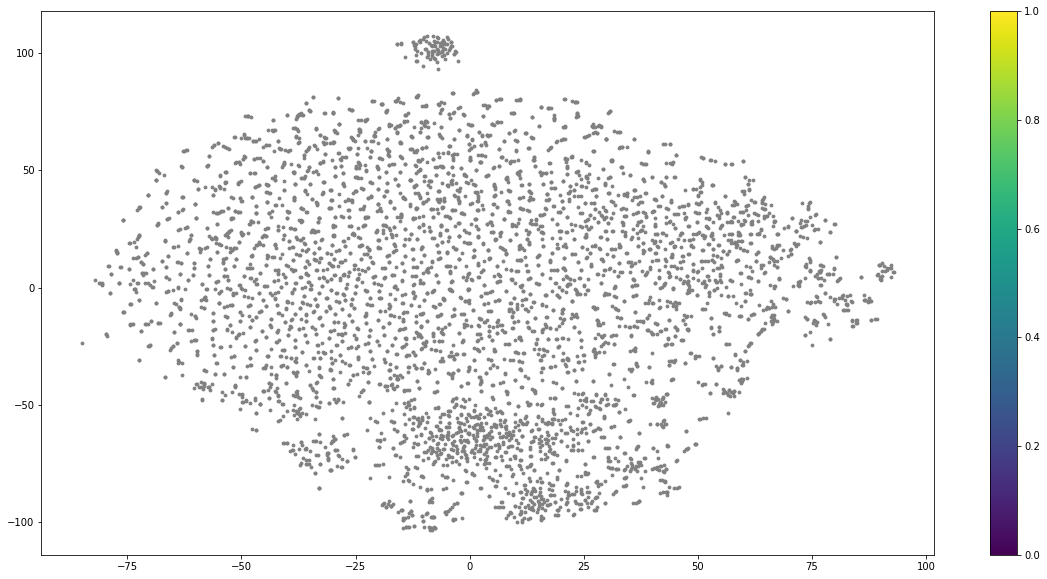

In [ ]:
visualize_tsne(token_embeddings)

In [ ]:
words_emb = torch.stack(words_emb)

In [ ]:
words_emb.shape

torch.Size([12984, 1024])

In [ ]:
documents_embeddings = encode(documents)

0/18466
100/18466
200/18466
300/18466
400/18466
500/18466
600/18466
700/18466
800/18466
900/18466
1000/18466
1100/18466
1200/18466
1300/18466
1400/18466
1500/18466
1600/18466
1700/18466
1800/18466
1900/18466
2000/18466
2100/18466
2200/18466
2300/18466
2400/18466
2500/18466
2600/18466
2700/18466
2800/18466
2900/18466
3000/18466
3100/18466
3200/18466
3300/18466
3400/18466
3500/18466
3600/18466
3700/18466
3800/18466
3900/18466
4000/18466
4100/18466
4200/18466
4300/18466
4400/18466
4500/18466
4600/18466
4700/18466
4800/18466
4900/18466
5000/18466
5100/18466
5200/18466
5300/18466
5400/18466
5500/18466
5600/18466
5700/18466
5800/18466
5900/18466
6000/18466
6100/18466
6200/18466
6300/18466
6400/18466
6500/18466
6600/18466
6700/18466
6800/18466
6900/18466
7000/18466
7100/18466
7200/18466
7300/18466
7400/18466
7500/18466
7600/18466
7700/18466
7800/18466
7900/18466
8000/18466
8100/18466
8200/18466
8300/18466
8400/18466
8500/18466
8600/18466
8700/18466
8800/18466
8900/18466
9000/18466
9100/18466


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
documents_embeddings = encode2(documents)
#words_emb = torch.stack(words_emb)

Output streaming troncato alle ultime 5000 righe.
876/5876
877/5876
878/5876
879/5876
880/5876
881/5876
882/5876
883/5876
884/5876
885/5876
886/5876
887/5876
888/5876
889/5876
890/5876
891/5876
892/5876
893/5876
894/5876
895/5876
896/5876
897/5876
898/5876
899/5876
900/5876
901/5876
902/5876
903/5876
904/5876
905/5876
906/5876
907/5876
908/5876
909/5876
910/5876
911/5876
912/5876
913/5876
914/5876
915/5876
916/5876
917/5876
918/5876
919/5876
920/5876
921/5876
922/5876
923/5876
924/5876
925/5876
926/5876
927/5876
928/5876
929/5876
930/5876
931/5876
932/5876
933/5876
934/5876
935/5876
936/5876
937/5876
938/5876
939/5876
940/5876
941/5876
942/5876
943/5876
944/5876
945/5876
946/5876
947/5876
948/5876
949/5876
950/5876
951/5876
952/5876
953/5876
954/5876
955/5876
956/5876
957/5876
958/5876
959/5876
960/5876
961/5876
962/5876
963/5876
964/5876
965/5876
966/5876
967/5876
968/5876
969/5876
970/5876
971/5876
972/5876
973/5876
974/5876
975/5876
976/5876
977/5876
978/5876
979/5876
980/5876
981/5

In [ ]:
documents_embeddings

tensor([[-2.6661e-03, -5.6157e-05, -2.8354e-05,  ...,  4.1372e-05,
          8.6914e-05,  2.0778e-02],
        [-2.6661e-03, -5.6157e-05, -2.8354e-05,  ...,  4.1372e-05,
          8.6914e-05,  2.0778e-02],
        [-2.6661e-03, -5.6157e-05, -2.8354e-05,  ...,  4.1372e-05,
          8.6914e-05,  2.0778e-02],
        ...,
        [-2.6661e-03, -5.6157e-05, -2.8354e-05,  ...,  4.1372e-05,
          8.6914e-05,  2.0778e-02],
        [-2.6661e-03, -5.6157e-05, -2.8354e-05,  ...,  4.1372e-05,
          8.6914e-05,  2.0778e-02],
        [-2.6661e-03, -5.6157e-05, -2.8354e-05,  ...,  4.1372e-05,
          8.6914e-05,  2.0778e-02]], dtype=torch.float64)

In [ ]:
len(words_ids)

833652

In [ ]:
words_emb = torch.stack(words_emb)

In [ ]:
words_embedding = torch.tensor((torch.stack(words_embedding)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [ ]:
documents_embeddings.shape

torch.Size([18466, 768])

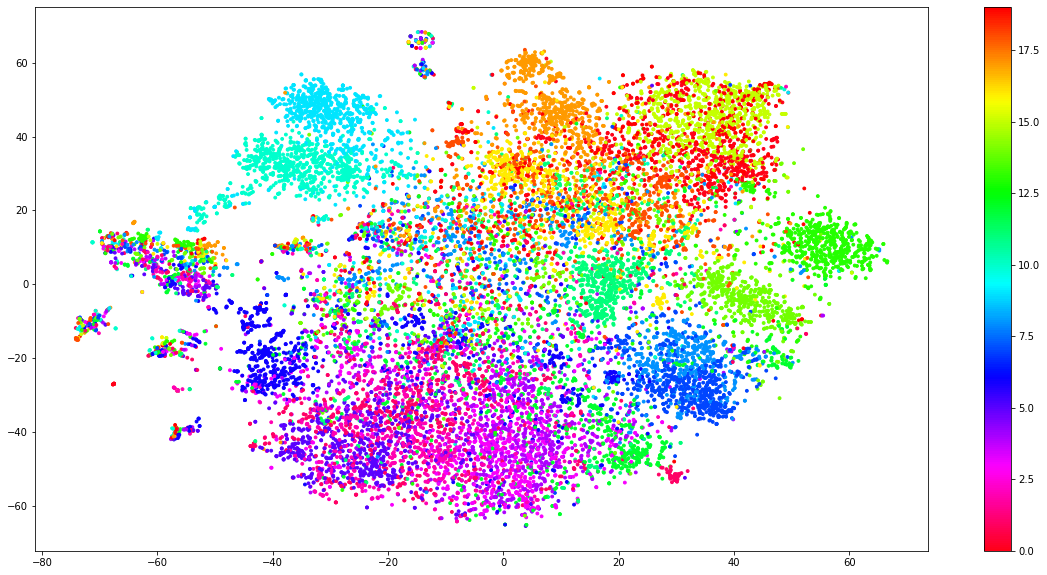

In [ ]:
# distilbert-base-uncased
visualize_tsne(documents_embeddings, labels=df.original_labels)

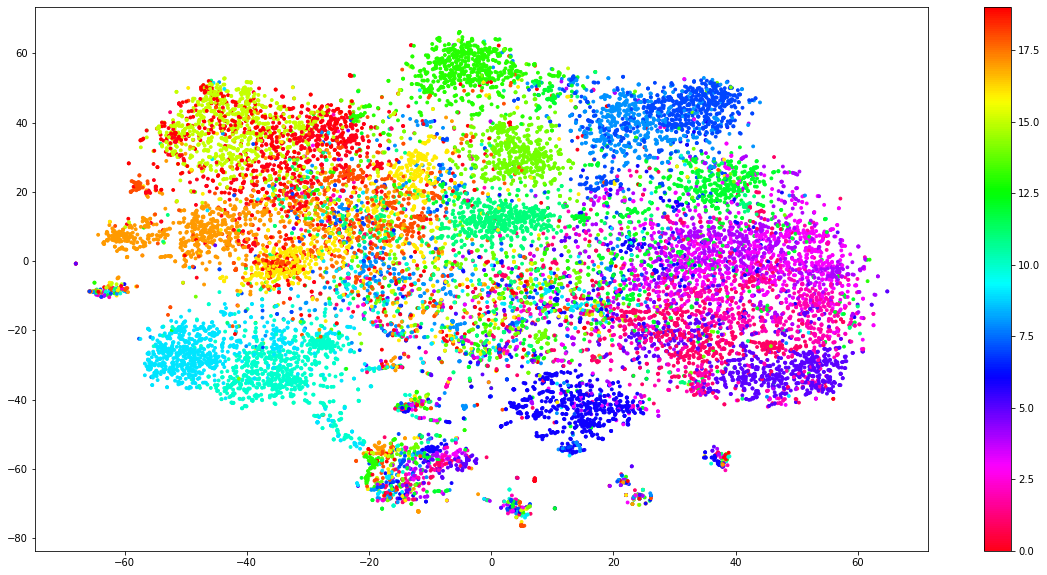

In [ ]:
# tmp/distilbert-base-uncased_20newsgroup
visualize_tsne(documents_embeddings, labels=df.original_labels)

## Sentence embedding T5 2

In [ ]:
# se non va provare ad aggiungere get_title:
documents = df.text.tolist()

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

def mean_pooling(model_output, attention_mask):
  token_embeddings = model_output
  input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
  sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
  sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
  return sum_embeddings / sum_mask

In [ ]:
def max_pooling(model_output, attention_mask):
  token_embeddings = model_output[0] 
  input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
  token_embeddings[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
  max_over_time = torch.max(token_embeddings, 1)[0]
  return max_over_time

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
train_corpus = [' '.join(simple_preprocess(strip_tags(doc), deacc=True)) for doc in documents]

vectorizer = CountVectorizer()
doc_word_counts = vectorizer.fit_transform(train_corpus)
words = vectorizer.get_feature_names()
word_counts = np.array(np.sum(doc_word_counts, axis=0).tolist()[0])
vocab_inds = np.where(word_counts > 50)[0]
vocab = [words[ind] for ind in vocab_inds]

In [ ]:
from sklearn.preprocessing import normalize

def _l2_normalize(vectors):
  if vectors.ndim == 2:
      return torch.tensor(normalize(vectors))
  else:
      return torch.tensor(normalize(vectors.reshape(1, -1))[0])

In [ ]:
from transformers import T5Model, T5Tokenizer, T5EncoderModel, T5TokenizerFast, T5ForConditionalGeneration, AutoTokenizer, AutoModel

#model = T5EncoderModel.from_pretrained('t5-small', output_hidden_states = True)
#tokenizer = T5TokenizerFast.from_pretrained('t5-small')

#model = AutoModel.from_pretrained("sentence-transformers/bert-base-nli-mean-tokens")
#tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/bert-base-nli-mean-tokens")

model = T5EncoderModel.from_pretrained('outputs', output_hidden_states = True)
tokenizer = T5TokenizerFast.from_pretrained('outputs')


Some weights of the model checkpoint at outputs were not used when initializing T5EncoderModel: ['decoder.embed_tokens.weight', 'decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.0.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.0.layer.2.DenseReluDense.wi.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.layer_norm.weight', 'decoder.block.1.layer.0.SelfAttention.q.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.0.SelfAttention.v.weight', 'de

In [ ]:
def encode(documents):
  tokens = tokenizer(documents, return_tensors="pt", padding=True, truncation=True, max_length=256)
  input_ids = tokens.input_ids

  batch_size = 100    
  documents_embeddings = []
  masks = tokens['attention_mask']

  for i in range(0, len(documents), batch_size):
    print(str(i) + "/" + str(len(df)))
    with torch.no_grad():    
      mask_batch = masks[i:i+batch_size]
      result = model(input_ids=input_ids[i:i+batch_size], attention_mask=mask_batch).last_hidden_state
      documents_embeddings.append(mean_pooling(result, mask_batch))
  documents_embeddings = torch.cat(documents_embeddings)
  return torch.tensor(_l2_normalize(documents_embeddings))

In [ ]:
token_embeddings = encode(vocab)

0/18466
100/18466
200/18466
300/18466
400/18466
500/18466
600/18466
700/18466
800/18466
900/18466
1000/18466
1100/18466
1200/18466
1300/18466
1400/18466
1500/18466
1600/18466
1700/18466
1800/18466
1900/18466
2000/18466
2100/18466
2200/18466
2300/18466
2400/18466
2500/18466
2600/18466
2700/18466
2800/18466
2900/18466
3000/18466
3100/18466
3200/18466
3300/18466
3400/18466
3500/18466
3600/18466
3700/18466
3800/18466
3900/18466
4000/18466
4100/18466
4200/18466
4300/18466
4400/18466
4500/18466
4600/18466
4700/18466
4800/18466
4900/18466
5000/18466
5100/18466
5200/18466
5300/18466
5400/18466
5500/18466


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


In [ ]:
len(vocab)

5588

In [ ]:
token_embeddings.shape

torch.Size([5588, 512])

In [ ]:
documents_embeddings = encode(documents)

0/18466
100/18466
200/18466
300/18466
400/18466
500/18466
600/18466
700/18466
800/18466
900/18466
1000/18466
1100/18466
1200/18466
1300/18466
1400/18466
1500/18466
1600/18466
1700/18466
1800/18466
1900/18466
2000/18466
2100/18466
2200/18466
2300/18466
2400/18466
2500/18466
2600/18466
2700/18466
2800/18466
2900/18466
3000/18466
3100/18466
3200/18466
3300/18466
3400/18466
3500/18466
3600/18466
3700/18466
3800/18466
3900/18466
4000/18466
4100/18466
4200/18466
4300/18466
4400/18466
4500/18466
4600/18466
4700/18466
4800/18466
4900/18466
5000/18466
5100/18466
5200/18466
5300/18466
5400/18466
5500/18466
5600/18466
5700/18466
5800/18466
5900/18466
6000/18466
6100/18466
6200/18466
6300/18466
6400/18466
6500/18466
6600/18466
6700/18466
6800/18466
6900/18466
7000/18466
7100/18466
7200/18466
7300/18466
7400/18466
7500/18466
7600/18466
7700/18466
7800/18466
7900/18466
8000/18466
8100/18466
8200/18466
8300/18466
8400/18466
8500/18466
8600/18466
8700/18466
8800/18466
8900/18466
9000/18466
9100/18466


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


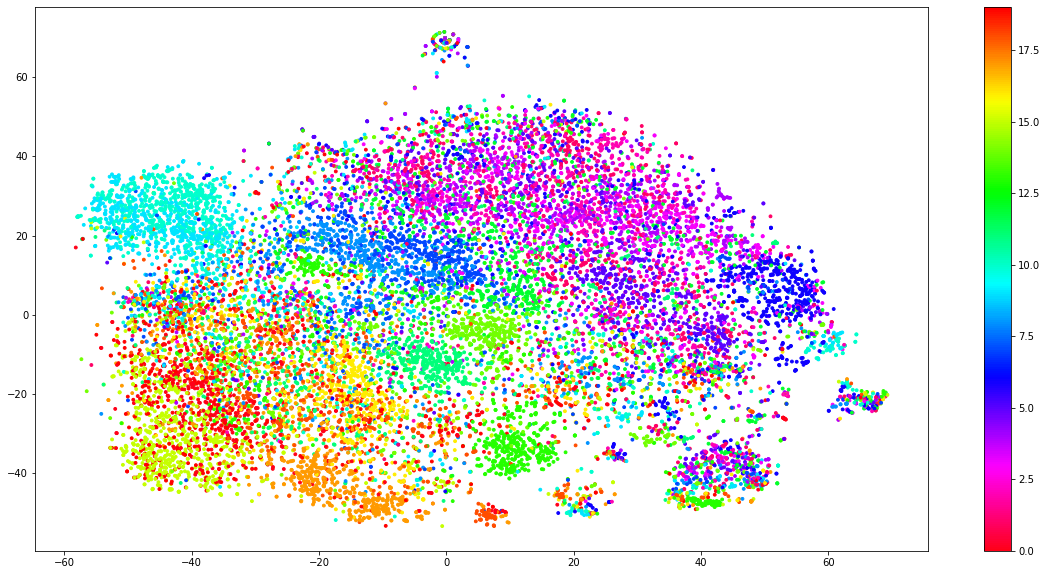

In [ ]:
visualize_tsne(documents_embeddings, labels=df.original_labels)

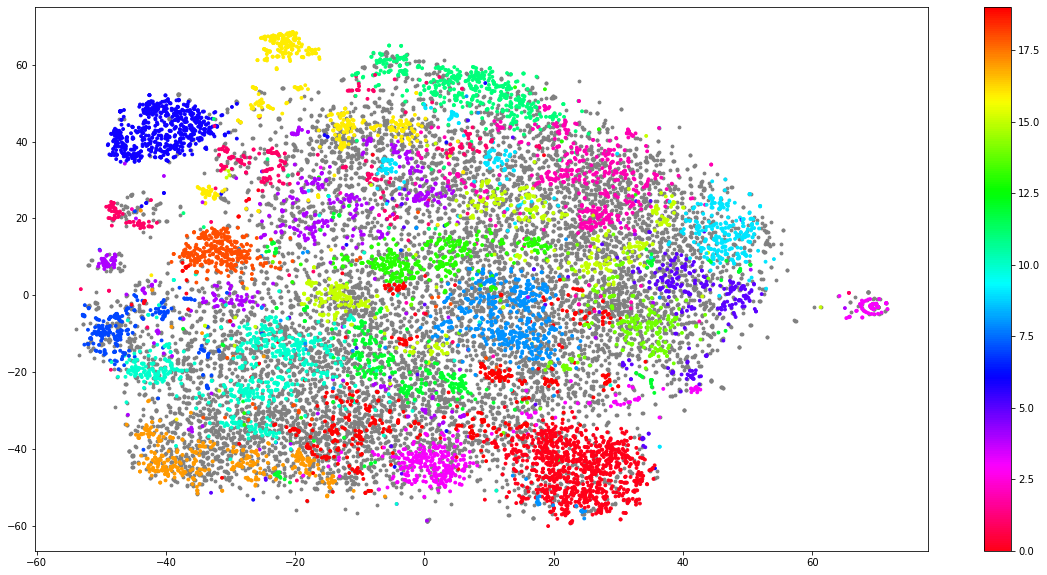

In [ ]:
visualize_tsne(documents_embeddings, labels=df.reduced)

## SBERT T5

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
documents = df.text.tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
train_corpus = [' '.join(simple_preprocess(strip_tags(doc), deacc=True)) for doc in documents]

vectorizer = CountVectorizer()
doc_word_counts = vectorizer.fit_transform(train_corpus)
words = vectorizer.get_feature_names()
word_counts = np.array(np.sum(doc_word_counts, axis=0).tolist()[0])
vocab_inds = np.where(word_counts > 50)[0]
vocab = [words[ind] for ind in vocab_inds]

In [ ]:
from torch import nn
from transformers import AutoModel, AutoTokenizer, AutoConfig
import json
from typing import List, Dict, Optional, Union, Tuple
import os


class Transformer(nn.Module):
    """Huggingface AutoModel to generate token embeddings.
    Loads the correct class, e.g. BERT / RoBERTa etc.
    :param model_name_or_path: Huggingface models name (https://huggingface.co/models)
    :param max_seq_length: Truncate any inputs longer than max_seq_length
    :param model_args: Arguments (key, value pairs) passed to the Huggingface Transformers model
    :param cache_dir: Cache dir for Huggingface Transformers to store/load models
    :param tokenizer_args: Arguments (key, value pairs) passed to the Huggingface Tokenizer model
    :param do_lower_case: Lowercase the input
    """
    def __init__(self, model_name_or_path: str, max_seq_length: int = 128,
                 model_args: Dict = {}, cache_dir: Optional[str] = None,
                 tokenizer_args: Dict = {}, do_lower_case: Optional[bool] = None):
        super(Transformer, self).__init__()
        self.config_keys = ['max_seq_length']
        self.max_seq_length = max_seq_length

        if do_lower_case is not None:
            tokenizer_args['do_lower_case'] = do_lower_case


        self.auto_model = T5EncoderModel.from_pretrained('outputs', output_hidden_states = True) #AutoModel.from_pretrained(model_name_or_path, config=config, cache_dir=cache_dir)
        self.tokenizer = T5TokenizerFast.from_pretrained('outputs') #AutoTokenizer.from_pretrained(model_name_or_path, cache_dir=cache_dir, **tokenizer_args)


    def forward(self, features):
        """Returns token_embeddings, cls_token"""
        trans_features = {'input_ids': features['input_ids'], 'attention_mask': features['attention_mask']}
        if 'token_type_ids' in features:
            trans_features['token_type_ids'] = features['token_type_ids']

        output_states = self.auto_model(**trans_features, return_dict=False)
        output_tokens = output_states[0]

        cls_tokens = output_tokens[:, 0, :]  # CLS token is first token
        features.update({'token_embeddings': output_tokens, 'cls_token_embeddings': cls_tokens, 'attention_mask': features['attention_mask']})

        if self.auto_model.config.output_hidden_states:
            all_layer_idx = 2
            if len(output_states) < 3: #Some models only output last_hidden_states and all_hidden_states
                all_layer_idx = 1

            hidden_states = output_states[all_layer_idx]
            features.update({'all_layer_embeddings': hidden_states})

        return features

    def get_word_embedding_dimension(self) -> int:
        return self.auto_model.config.hidden_size

    def tokenize(self, texts: Union[List[str], List[Tuple[str, str]]]):
        """
        Tokenizes a text and maps tokens to token-ids
        """
        output = {}
        if isinstance(texts[0], str):
            to_tokenize = [texts]
        elif isinstance(texts[0], dict):
            to_tokenize = []
            output['text_keys'] = []
            for lookup in texts:
                text_key, text = next(iter(lookup.items()))
                to_tokenize.append(text)
                output['text_keys'].append(text_key)
            to_tokenize = [to_tokenize]
        else:
            batch1, batch2 = [], []
            for text_tuple in texts:
                batch1.append(text_tuple[0])
                batch2.append(text_tuple[1])
            to_tokenize = [batch1, batch2]

        output.update(self.tokenizer(*to_tokenize, padding=True, truncation='longest_first', return_tensors="pt", max_length=self.max_seq_length))
        return output


    def get_config_dict(self):
        return {key: self.__dict__[key] for key in self.config_keys}

    def save(self, output_path: str):
        self.auto_model.save_pretrained(output_path)
        self.tokenizer.save_pretrained(output_path)

        with open(os.path.join(output_path, 'sentence_bert_config.json'), 'w') as fOut:
            json.dump(self.get_config_dict(), fOut, indent=2)

    @staticmethod
    def load(input_path: str):
        #Old classes used other config names than 'sentence_bert_config.json'
        for config_name in ['sentence_bert_config.json', 'sentence_roberta_config.json', 'sentence_distilbert_config.json', 'sentence_camembert_config.json', 'sentence_albert_config.json', 'sentence_xlm-roberta_config.json', 'sentence_xlnet_config.json']:
            sbert_config_path = os.path.join(input_path, config_name)
            if os.path.exists(sbert_config_path):
                break

        with open(sbert_config_path) as fIn:
            config = json.load(fIn)
        return Transformer(model_name_or_path=input_path, **config)


In [ ]:
model_save_path = 'output_sentence/test'
model = SentenceTransformer(model_save_path)

Some weights of the model checkpoint at outputs were not used when initializing T5EncoderModel: ['decoder.embed_tokens.weight', 'decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.0.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.0.layer.2.DenseReluDense.wi.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.layer_norm.weight', 'decoder.block.1.layer.0.SelfAttention.q.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.0.SelfAttention.v.weight', 'de

In [ ]:
from sklearn.preprocessing import normalize

def _l2_normalize(vectors):
  if vectors.ndim == 2:
      return torch.tensor(normalize(vectors))
  else:
      return torch.tensor(normalize(vectors.reshape(1, -1))[0])

In [ ]:
word_indexes = dict(zip(vocab, range(len(vocab))))
token_embeddings = torch.tensor(_l2_normalize(np.array(model.encode(vocab))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
train_corpus = train_corpus
batch_size = 500
document_vectors = []

current = 0
batches = int(len(train_corpus) / batch_size)
extra = len(train_corpus) % batch_size

for ind in range(0, batches):
    document_vectors.append(model.encode(train_corpus[current:current + batch_size]))
    current += batch_size

if extra > 0:
    document_vectors.append(model.encode(train_corpus[current:current + extra]))

documents_embeddings = torch.tensor(_l2_normalize(np.array(np.vstack(document_vectors))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


In [ ]:
torch.save(documents_embeddings, "./tokens/documents_embedding_20newsgorupcomplete_sentencetransformer_distiluse-base-multilingual-cased-v2")

In [ ]:
documents_embeddings = torch.load("./tokens/documents_embedding_20newsgorupcomplete_sentencetransformer_distiluse-base-multilingual-cased-v2")

In [ ]:
# Embedding di tutti i documenti

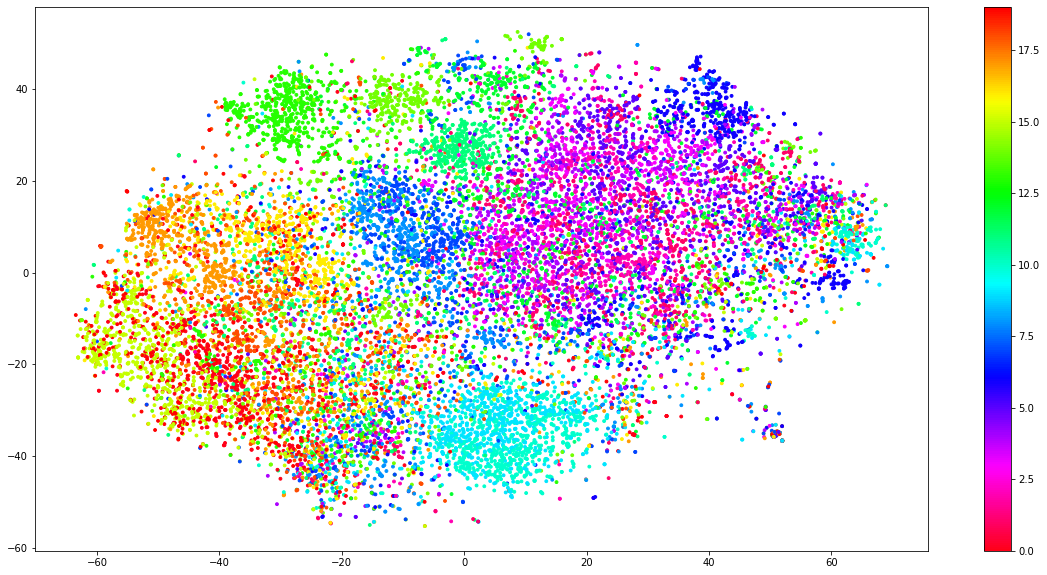

In [ ]:
visualize_tsne(documents_embeddings, labels=df.original_labels)

In [ ]:
# Use Huggingface/transformers model (like BERT, RoBERTa, XLNet, XLM-R) for mapping tokens to embeddings
word_embedding_model = Transformer("outputs", max_seq_length=128)# T5EncoderModel.from_pretrained('outputs', output_hidden_states = True) #

# Apply mean pooling to get one fixed sized sentence vector
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(),
                               pooling_mode_mean_tokens=True,
                               pooling_mode_cls_token=False,
                               pooling_mode_max_tokens=False)
model_save_path = 'output_sentence/training_nli_outputs-2021-02-12_15-03-46'
model = SentenceTransformer(model_save_path, modules=[word_embedding_model, pooling_model])

## Word embedding

https://github.com/cyk1337/BERT-Word-Embeddings-Pytorch/blob/main/extract_bert_embedding.py

In [ ]:
documents = df.text.tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
train_corpus = [' '.join(simple_preprocess(strip_tags(doc), deacc=True)) for doc in documents]
a = []
for doc in documents: 
  new_string = ' '.join([w for w in doc.split() if len(w)>3])
  a.append(new_string)
train_corpus = a
vectorizer = CountVectorizer()
doc_word_counts = vectorizer.fit_transform(train_corpus)
words = vectorizer.get_feature_names()
word_counts = np.array(np.sum(doc_word_counts, axis=0).tolist()[0])
vocab_inds = np.where(word_counts > 50)[0]
vocab = [words[ind] for ind in vocab_inds]

In [ ]:
from sklearn.preprocessing import normalize

def _l2_normalize(vectors):
  if vectors.ndim == 2:
      return torch.tensor(normalize(vectors))
  else:
      return torch.tensor(normalize(vectors.reshape(1, -1))[0])

In [ ]:
import torch
from transformers import BertTokenizer, BertModel, AutoModel, AutoTokenizer
import pandas as pd
import os


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased', output_hidden_states=True)

model.to(device)

model.eval()

def encode(documents):

  documents_embeddings = []

  for i, text in enumerate(documents):
    print(str(i) + "/" + str(len(documents)))
    merge_step_queue = list()  # save merge_steps
    marked_text = '[CLS] ' + text + ' [SEP]'
    tokenized_text = tokenizer.tokenize(marked_text)[:512]
    for i, token in enumerate(tokenized_text):
        if token.startswith("##"):
            merge_step_queue[-1] += 1
        else:
            merge_step_queue.append(1)

    #print(f"{len(merge_step_queue)} tokens: {text}, {len(tokenized_text)} word-tokens: {tokenized_text}")

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # for tup in zip(tokenized_text, indexed_tokens):
    #     print('{:<12} {:>6,}'.format(tup[0], tup[1]))

    # segments_ids = [1] * len(tokenized_text)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens]).to(device)
    # segments_tensors = torch.tensor([segments_ids])

    bert_embeddings = []
    with torch.no_grad():
        outputs = model(tokens_tensor)
        #last_four_layer_hidden_states = outputs.hidden_states[-4:]
        #last_four_layer_embeddings = torch.stack(last_four_layer_hidden_states, dim=0)
        #token_embeddings = torch.squeeze(torch.sum(last_four_layer_embeddings, dim=0))
        token_embeddings = torch.squeeze(outputs.last_hidden_state)
        start = 0
        while start < len(indexed_tokens):
            cur_step = merge_step_queue.pop(0)
            if cur_step > 1:
                embedding = torch.mean(token_embeddings[start: start+cur_step, :], dim=0)
            else:
                embedding = token_embeddings[start]
            bert_embeddings.append(embedding)
            start += cur_step
        bert_embedding = torch.vstack(bert_embeddings)
        bert_embedding = bert_embedding.cpu().numpy()
        #bert_embedding = bert_embedding[1:-1]
        #all_embeddings.append(bert_embedding)
        documents_embeddings.append(torch.mean(torch.tensor(bert_embedding), 0))
        del bert_embedding
      
  return torch.stack(documents_embeddings)
    #documents_embeddings.append(torch.mean(torch.tensor(all_embeddings), 1))

In [ ]:
import torch
from transformers import BertTokenizer, BertModel, AutoModel, AutoTokenizer
import pandas as pd
import os

def encode_words(documents):

  documents_embeddings = []
  words = []
  words_emb = []

  for i, text in enumerate(documents):
    merge_step_queue = list()  # save merge_steps
    marked_text = '[CLS] ' + text + ' [SEP]'
    tokenized_text = tokenizer.tokenize(marked_text)[:512]
    for i, token in enumerate(tokenized_text):
        if token.startswith("##"):
            merge_step_queue[-1] += 1
        else:
            merge_step_queue.append(1)

    #print(f"{len(merge_step_queue)} tokens: {text}, {len(tokenized_text)} word-tokens: {tokenized_text}")

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # for tup in zip(tokenized_text, indexed_tokens):
    #     print('{:<12} {:>6,}'.format(tup[0], tup[1]))

    # segments_ids = [1] * len(tokenized_text)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens]).to(device)
    # segments_tensors = torch.tensor([segments_ids])

    bert_embeddings = []
    with torch.no_grad():
        outputs = model(tokens_tensor)
        #last_four_layer_hidden_states = outputs.hidden_states[-4:]
        #last_four_layer_embeddings = torch.stack(last_four_layer_hidden_states, dim=0)
        #token_embeddings = torch.squeeze(torch.sum(last_four_layer_embeddings, dim=0))
        token_embeddings = torch.squeeze(outputs.last_hidden_state)
        start = 0
        while start < len(indexed_tokens):
            cur_step = merge_step_queue.pop(0)
            if cur_step > 1:
                word = ''.join(tokenized_text[start: start+cur_step])
                embedding = torch.mean(token_embeddings[start: start+cur_step, :], dim=0)
            else:
                embedding = token_embeddings[start]
                word = tokenized_text[start]
            bert_embeddings.append(embedding)
            if word not in ['[CLS]', '[SEP]']:
              words.append(word)
            start += cur_step
        bert_embedding = torch.vstack(bert_embeddings)
        bert_embedding = bert_embedding.cpu().numpy()
        words_emb.append(torch.tensor(bert_embedding)[1:-1])
        #bert_embedding = bert_embedding[1:-1]
        #all_embeddings.append(bert_embedding)
        del bert_embedding
      
  return (torch.cat(words_emb)), words
    #documents_embeddings.append(torch.mean(torch.tensor(all_embeddings), 1))

In [ ]:
word_indexes = dict(zip(vocab, range(len(vocab))))
token_embeddings = torch.tensor(np.array(encode(vocab)))

In [ ]:
bert_embedding

NameError: ignored

In [ ]:
len(words)

223

In [ ]:
words_emb.shape

torch.Size([223, 768])

In [ ]:
documents_embeddings = encode(documents=train_corpus)

Token indices sequence length is longer than the specified maximum sequence length for this model (1073 > 512). Running this sequence through the model will result in indexing errors


Output streaming troncato alle ultime 5000 righe.
13466/18466
13467/18466
13468/18466
13469/18466
13470/18466
13471/18466
13472/18466
13473/18466
13474/18466
13475/18466
13476/18466
13477/18466
13478/18466
13479/18466
13480/18466
13481/18466
13482/18466
13483/18466
13484/18466
13485/18466
13486/18466
13487/18466
13488/18466
13489/18466
13490/18466
13491/18466
13492/18466
13493/18466
13494/18466
13495/18466
13496/18466
13497/18466
13498/18466
13499/18466
13500/18466
13501/18466
13502/18466
13503/18466
13504/18466
13505/18466
13506/18466
13507/18466
13508/18466
13509/18466
13510/18466
13511/18466
13512/18466
13513/18466
13514/18466
13515/18466
13516/18466
13517/18466
13518/18466
13519/18466
13520/18466
13521/18466
13522/18466
13523/18466
13524/18466
13525/18466
13526/18466
13527/18466
13528/18466
13529/18466
13530/18466
13531/18466
13532/18466
13533/18466
13534/18466
13535/18466
13536/18466
13537/18466
13538/18466
13539/18466
13540/18466
13541/18466
13542/18466
13543/18466
13544/18466
13

In [ ]:
words_emb.shape

torch.Size([1009936, 768])

In [ ]:
words_emb = torch.cat(words_emb)

TypeError: ignored

In [ ]:
torch.any(documents_embeddings.isnan())

tensor(True)

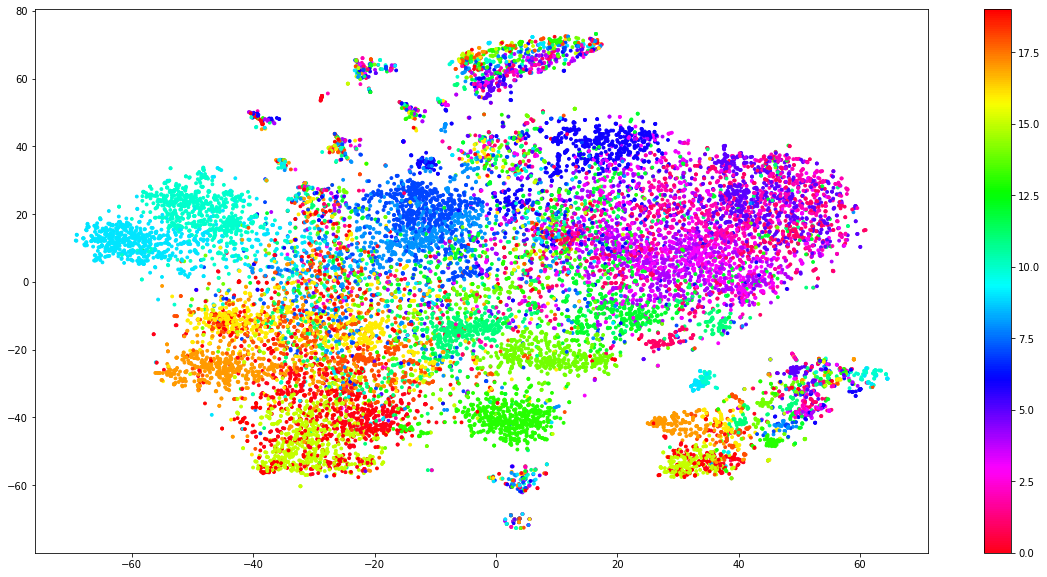

In [ ]:
# distilbert-base-uncased
visualize_tsne(documents_embeddings, labels=df.original_labels)

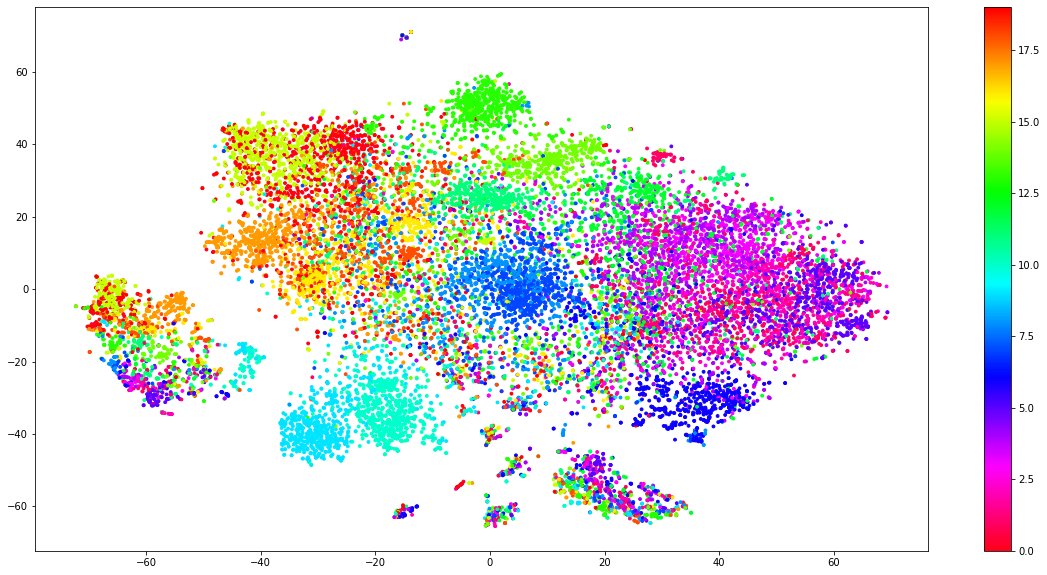

In [ ]:
# bert-base-uncased
visualize_tsne(documents_embeddings, labels=df.original_labels)

# Clustering

## UMAP + KMEANS

In [14]:
#umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine')
#documents_embedding_reduced = umap_model.fit_transform(documents_embeddings)

kmeans = KMeans(n_clusters=20, random_state=0).fit(documents_embeddings)

df['umap_kmeans'] = kmeans.labels_

## UMAP + HDBSCAN

In [15]:
umap_model = umap.UMAP(n_neighbors=5, n_components=5, metric='cosine')
documents_embedding_reduced = umap_model.fit_transform(documents_embeddings)

cluster = hdbscan.HDBSCAN(min_cluster_size=7, metric='euclidean', cluster_selection_method='eom').fit(documents_embedding_reduced)

df['umap_hdbscan'] = cluster.labels_

## Hyearycal cluster

In [ ]:
from scipy.cluster.hierarchy import linkage,fcluster
from scipy.spatial.distance import pdist

p_dist = pdist(documents_embeddings, metric='euclidean')
z = linkage(p_dist, 'average')
cluster_index = fcluster(z, 20, criterion='maxclust')

In [ ]:
df['hyearycal_cluster'] = cluster_index

In [ ]:
df['hyearycal_cluster'].unique()

array([ 9, 19, 13,  4, 16, 17, 10,  2, 15, 12, 14,  3,  7,  6,  1,  5, 11,
       18, 20,  8], dtype=int32)

## Valutazione cluster

In [16]:
from sklearn import metrics
metrics.adjusted_rand_score(df.original_labels.tolist(), df.umap_kmeans.tolist())

0.16911568605408292

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(df.original_labels.tolist(), df.umap_kmeans.tolist())

0.29792811703321886

In [ ]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df.original_labels.tolist(), df.umap_kmeans.tolist())

0.8680455978904231

In [ ]:
df.loc[df.reduced == -1]

index  ... reduced
2         2  ...      -1
4         4  ...      -1
5         5  ...      -1
10       10  ...      -1
11       11  ...      -1
...     ...  ...     ...
5865   5989  ...      -1
5868   5992  ...      -1
5873   5997  ...      -1
5874   5998  ...      -1
5875   5999  ...      -1

[2010 rows x 6 columns]

In [ ]:
df2 = df.loc[df.reduced != -1]

In [ ]:
from sklearn import metrics
metrics.adjusted_rand_score(df2.original_labels.tolist(), df2.reduced.tolist())

0.3653883233664574

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(df2.original_labels.tolist(), df2.reduced.tolist())

0.49038474582437697

In [ ]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df2.original_labels.tolist(), df2.reduced.tolist())

1.0765578126575672

# Visualizzazione topic

In [ ]:
df

index  ... umap_hdbscan
0          0  ...           11
1          1  ...           -1
2          2  ...           -1
3          3  ...          194
4          4  ...           -1
...      ...  ...          ...
18461  18841  ...           72
18462  18842  ...          197
18463  18843  ...           -1
18464  18844  ...          124
18465  18845  ...          160

[18466 rows x 5 columns]

## UMAP

In [ ]:
import matplotlib.pyplot as plt

def visualize_umap(embedding, labels=None, words=None):
  if words is not None:
    reduced = umap.UMAP(n_neighbors=5, n_components=2, min_dist=0.0, metric='cosine').fit_transform(torch.cat([embedding, words]))
    embedding2 = reduced[:embedding.shape[0]]
    words = reduced[embedding.shape[0]:]
  else: 
    embedding2 = umap.UMAP(n_neighbors=5, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embedding)

  result = pd.DataFrame(embedding2, columns=['x', 'y'])
  fig, ax = plt.subplots(figsize=(20, 10))
  if labels is not None:
    result['labels'] = labels
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='grey', s=8)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=8, cmap='hsv_r')
  else:
    clustered = result.loc[:, :]
    plt.scatter(clustered.x, clustered.y, s=8, color='grey')
  if words is not None:
    result2 = pd.DataFrame(words, columns=['x', 'y'])
    clustered2 = result2.loc[:, :]
    plt.scatter(clustered2.x, clustered2.y, s=30, color='black')
  plt.colorbar()


## TSNE

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_tsne(embedding, labels=None, words=None):
  if words is not None:
    reduced = TSNE(n_components=2).fit_transform(torch.cat([embedding, words]))
    embedding2 = reduced[:embedding.shape[0]]
    words = reduced[embedding.shape[0]:]
  else: 
    embedding2 = TSNE(n_components=2).fit_transform(embedding)

  result = pd.DataFrame(embedding2, columns=['x', 'y'])
  fig, ax = plt.subplots(figsize=(20, 10))
  if labels is not None:
    result['labels'] = labels
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='grey', s=8)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=8, cmap='hsv_r')
  else:
    clustered = result.loc[:, :]
    plt.scatter(clustered.x, clustered.y, s=10, color='red')
  if words is not None:
    result2 = pd.DataFrame(words, columns=['x', 'y'])
    clustered2 = result2.loc[:, :]
    plt.scatter(clustered2.x, clustered2.y, s=5, color='black')
  plt.colorbar()

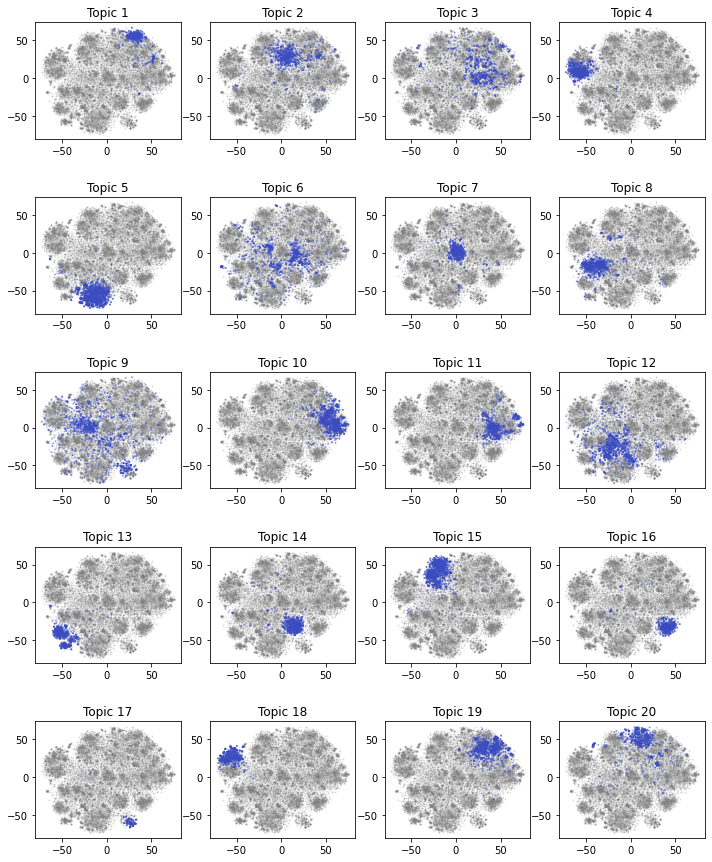

In [ ]:
visualize_tsne_separated(embedding2, labels=kmeans.labels_)

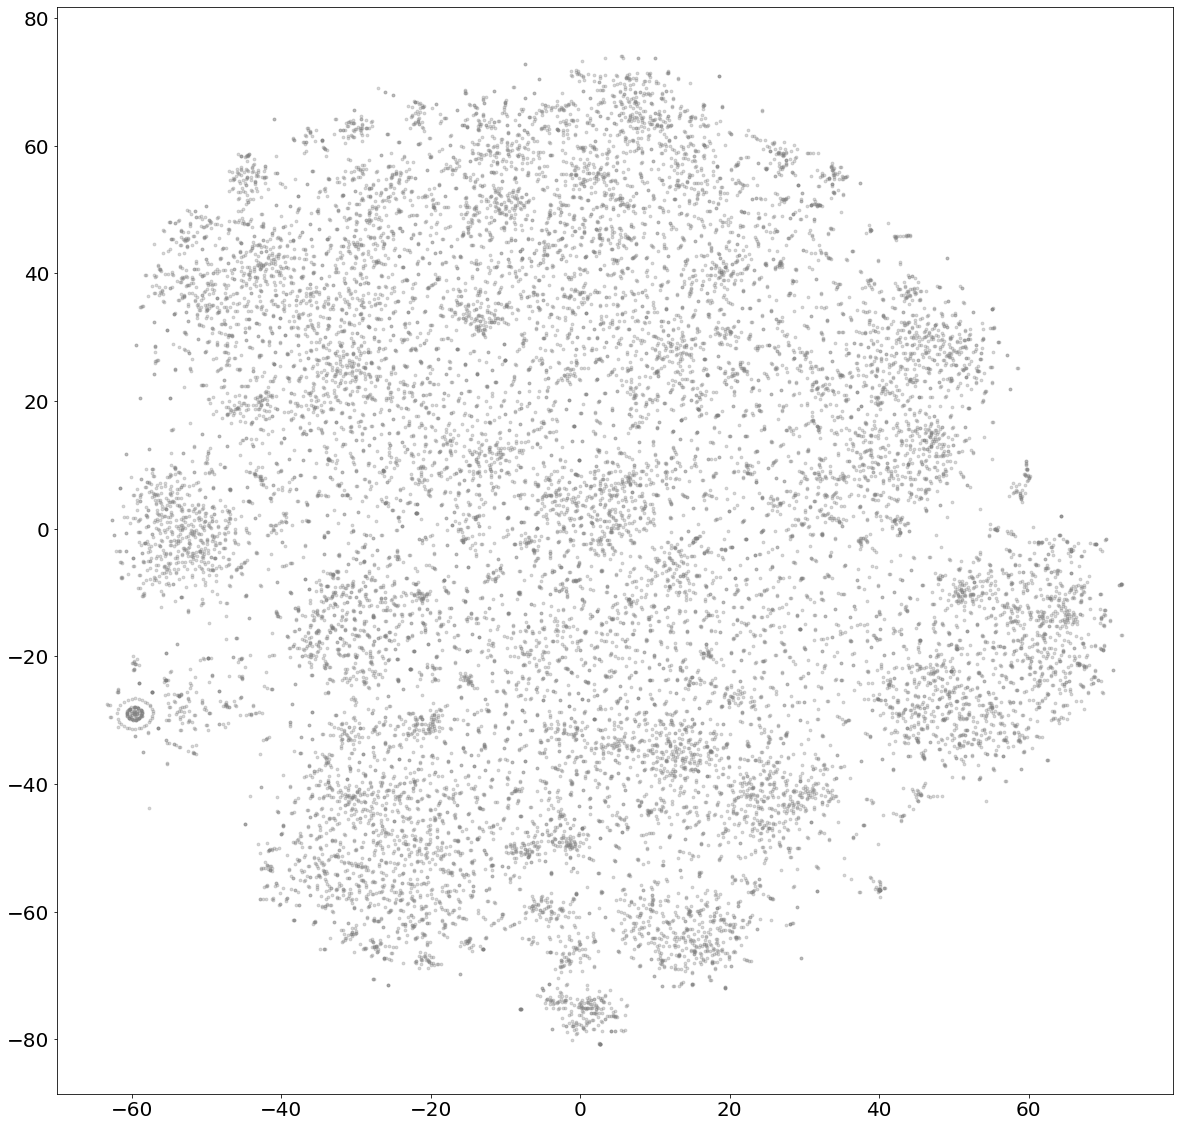

In [ ]:
result = pd.DataFrame(embedding2, columns=['x', 'y'])
fig, ax = plt.subplots(figsize=(20, 20))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(20)
plt.scatter(result.x, result.y, c='grey', s=8, alpha=0.3)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
embedding2 = TSNE(n_components=2).fit_transform(documents_embeddings)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_tsne_separated(embedding2, labels=None,):
  result = pd.DataFrame(embedding2, columns=['x', 'y'])
  result['labels'] = labels
  fig=plt.figure(figsize=(12, 15))
  fig.subplots_adjust(hspace=.5)
  columns = 4
  rows = 5
  for i in range(1, columns*rows +1):
    outliers = result.loc[result.labels != i-1, :]
    clustered = result.loc[result.labels == i-1, :]
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text('Topic ' + str(i))
    ax.scatter(outliers.x, outliers.y, color='grey', s=1, alpha=0.1)
    ax.scatter(clustered.x, clustered.y, c=clustered.labels, s=1, cmap='coolwarm', alpha=0.4)
  plt.show()

In [ ]:
!pip install cuml

  ERROR: Failed building wheel for cuml
  Running setup.py clean for cuml
Failed to build cuml
    Running setup.py install for cuml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-btl7ljv3/cuml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-btl7ljv3/cuml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-3p9tw1_p/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from cuml.manifold as TSNE2

def visualize_tsne_cuda(embedding, labels=None, words=None):
  if words is not None:
    reduced = TSNE2(n_components=2).fit_transform(torch.cat([embedding, words]))
    embedding2 = reduced[:embedding.shape[0]]
    words = reduced[embedding.shape[0]:]
  else: 
    embedding2 = TSNE2(n_components=2).fit_transform(embedding)

  result = pd.DataFrame(embedding2, columns=['x', 'y'])
  fig, ax = plt.subplots(figsize=(20, 10))
  if labels is not None:
    result['labels'] = labels
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='grey', s=8)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=8, cmap='hsv_r')
  else:
    clustered = result.loc[:, :]
    plt.scatter(clustered.x, clustered.y, s=8, color='grey')
  if words is not None:
    result2 = pd.DataFrame(words, columns=['x', 'y'])
    clustered2 = result2.loc[:, :]
    plt.scatter(clustered2.x, clustered2.y, s=5, color='red')
  plt.colorbar()

SyntaxError: ignored

# Topic vectors
Trovo i vettori dei topic facendo la media tra i vettori dei documenti appartenenti allo stesso topic

In [39]:
df2 = df.drop(df[df.umap_kmeans == -1].index)
n_topic = sorted(df2.umap_kmeans.unique())
topic_vectors = []
topic_sizes = []

for topic in n_topic:
  mean = []
  count = 0
  indexes = df2[df2.umap_kmeans == topic].index.tolist()
  for index in indexes:
    count += 1
    mean.append(documents_embeddings[index])
  mean = torch.stack(mean)
  topic_vectors.append(torch.mean(mean, dim=0))
  topic_sizes.append(count)
topic_vectors = torch.tensor((torch.stack(topic_vectors)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


In [40]:
topic_vectors.shape

torch.Size([20, 768])

# Riduzione dei topic
1.   Prendo il topic con meno documenti associati e il topic più vicino ad esso
2.   Calcolo il topic della loro unione come una media tra i due topic pesata dal numero di documenti associati ad essi
3.   Ricalcolo le grandezze dei topic
4.   Ripeto fino a quando raggiungo il numero di topic che voglio








In [41]:
df2['reduced'] = df2.umap_hdbscan
topic_vectors_reduced = topic_vectors

In [44]:
from sklearn.preprocessing import normalize
from scipy import spatial

while topic_sizes.count(9999999) < len(topic_sizes) - 7:
  n_topic = len(df2.reduced.unique())

  smallest = topic_sizes.index(min(topic_sizes))
  a, i = spatial.KDTree(topic_vectors_reduced).query(topic_vectors_reduced[smallest], k=2)
  if i[1] != smallest: 
    most_sim = i[1]
  else:
    most_sim = i[0]

  top_vec_smallest = topic_vectors[smallest]
  smallest_size = topic_sizes[smallest]

  top_vec_most_sim = topic_vectors[most_sim]
  most_sim_size = topic_sizes[most_sim]

  combined_vec = _l2_normalize(((top_vec_smallest * smallest_size) +
                                      (top_vec_most_sim * most_sim_size)) / (smallest_size + most_sim_size))

  df2.loc[df2.reduced == smallest, 'reduced'] = most_sim
  topic_vectors_reduced[smallest] = torch.ones(topic_vectors_reduced[smallest].shape) * 99999
  topic_vectors_reduced[most_sim] = combined_vec
  topic_sizes[most_sim] = smallest_size + most_sim_size
  topic_sizes[smallest] = 9999999  

df['reduced'] = -1
df.loc[df.umap_hdbscan != -1, 'reduced'] = df2.reduced

indexes = df.reduced.unique()
count = 0
for i in indexes:
  if i != -1:
    df.loc[df.reduced == i, 'reduced'] = count
    count += 1

topic_sizes = list(filter(lambda a: a != 9999999, topic_sizes))

topics_vector = []
for i in topic_vectors_reduced:
  if not torch.all(i.eq(torch.ones(topic_vectors_reduced[0].shape) * 99999)):
    topics_vector.append(i)
topic_vectors_reduced = torch.stack(topics_vector)

In [45]:
topic_vectors_reduced.shape

torch.Size([7, 768])

In [ ]:
visualize_tsne(documents_embeddings, labels=df.reduced, words=topic_vectors_reduced)

# Estrazione parole topic

## CTFIDF 

In [17]:
df

index  ... umap_hdbscan
0          0  ...            6
1          1  ...           -1
2          2  ...           66
3          3  ...          245
4          4  ...           -1
...      ...  ...          ...
18461  18841  ...           58
18462  18842  ...           63
18463  18843  ...           -1
18464  18844  ...           62
18465  18845  ...           -1

[18466 rows x 5 columns]

In [18]:
dataset2 = pd.DataFrame(df, columns=["text"])
dataset2['topic'] = df.umap_kmeans
dataset2['Doc_ID'] = range(len(dataset2))
docs_per_topic = dataset2.groupby(['topic'], as_index = False).agg({'text': ' '.join})

In [19]:
docs_per_topic

topic                                               text
0       0  .........\nI, some years ago, almost became a ...
1       1  \n\n\n\n\n \n\n\n \n\n \n\n\n\n \n\n   \n \n \...
2       2  \nThink!\n\nIt's the SCSI card doing the DMA t...
3       3  the blood of the lamb.\n\nThis will be a hard ...
4       4  1528.98\n                         ^^^^^^^^\n\n...
5       5  \n\n\tThere is no notion of heliocentric, or e...
6       6  \n\nI am sure some bashers of Pens fans are pr...
7       7  <<I wrote>\n<Is there a resource available to ...
8       8  \n\nBack in high school I worked as a lab assi...
9       9  Here are the NHL's alltime leaders in goals an...
10     10  \nSorry, that's a feature.  The ICCCM specifie...
11     11  Just opened up the distribution.\n \nWetteland...
12     12   >say they have a "history of untrustworthy be...
13     13  My brother is in the market for a high-perform...
14     14  \n\n\n\n\tFinally you said what you dream abou...
15     15   How about Kirlian imaging ? I believe the FAQ...
16     16  930418\n\nDo what thou wilt shall be the whole...
17     17  \nIf a Christian means someone who believes in...
18     18  \n\nAE is in Dallas...try 214/241-6060 or 214/...
19     19  According to a previous poster, one should see...

In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.text.values, m=1000)

In [21]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['topic'])
                     .text
                     .count()
                     .reset_index()
                     .rename({"topic": "topic", "text": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(dataset2)
topic_sizes.head(20)

topic  Size
14     14  1736
12     12  1639
2       2  1630
16     16  1329
10     10  1258
0       0  1232
6       6  1176
3       3  1166
15     15  1061
13     13   934
9       9   778
18     18   737
5       5   731
8       8   722
7       7   543
19     19   541
11     11   385
4       4   380
17     17   340
1       1   148

In [22]:
for i in topic_sizes.topic:
 print("topic " + str(i) + ": "), print(top_n_words[i][0:10])

topic 14: 
[('stephanopoulos', 0.0008801499335997198), ('turks', 0.0008512568827177176), ('myers', 0.000845224853316164), ('istanbul', 0.0007657128561041375), ('genocide', 0.000758579279473538), ('ottoman', 0.0007516671221127717), ('armenia', 0.0007368555297880709), ('adl', 0.0007303399038520917), ('villages', 0.0007219388874717757), ('turkey', 0.0007155460823698641)]
topic 12: 
[('nsa', 0.0018127936662037866), ('batf', 0.0017514427689241626), ('koresh', 0.0014418024298517079), ('warrant', 0.001388584584243001), ('clinton', 0.0013690339054518441), ('arabs', 0.0013569553301561997), ('compound', 0.0013486163740367109), ('fbi', 0.0012933161366494679), ('bd', 0.0012879964343909755), ('illegal', 0.0012871756066114958)]
topic 2: 
[('serial', 0.0013557120682734095), ('ide', 0.0013224266210561766), ('motherboard', 0.0012839644231495062), ('modem', 0.0012338637697215612), ('chips', 0.0011984830621260035), ('pins', 0.001186635521929165), ('irq', 0.0011786896357618177), ('port', 0.001175076969766

In [23]:
topics = []
for i in topic_sizes.topic:
  topic = []
  for j in range(20):
    topic.append(top_n_words[i][j][0])
  topics.append(topic)

In [24]:
df2 = pd.DataFrame.from_records(topics)

In [25]:
df2.head(20)

0             1   ...           18            19
0   stephanopoulos         turks  ...  palestinian         greek
1              nsa          batf  ...         arab          cops
2           serial           ide  ...        cards           486
3          jehovah     scripture  ...    salvation      marriage
4              ini          cica  ...         apps           zip
5             bike        helmet  ...        miles          cars
6             espn      pitching  ...        coach          fans
7             yeah          joke  ...       stupid          sigh
8       appreciate         thank  ...    newsgroup        buying
9      motherboard      shipping  ...      upgrade           obo
10             lib            03  ...           05           tar
11         feustel     chemistry  ...      klinger      embalmer
12             mov     apartment  ...           bh            ar
13          larson         orbit  ...   atmosphere       unified
14            ford        toyota  ...   suspension         liter
15         vitamin       chronic  ...     chromium      syndrome
16            45th  _incredibly_  ...        bored         tesrt
17             2tm           2di  ...          6um            5u
18         barbara         santa  ...          hfe     champions
19    consistently           dir  ...       dilbar  dilectissimi

[20 rows x 20 columns]

## Parole vicine ai documenti

In [43]:
topic_words = []
topic_word_scores = []

res = np.inner(topic_vectors_reduced, words_emb)
top_words = np.flip(np.argsort(res, axis=1), axis=1)
top_scores = np.flip(np.sort(res, axis=1), axis=1)

for words, scores in zip(top_words, top_scores):
    topic_words.append([tokenizer.convert_ids_to_tokens(words_ids[i].item()) for i in words[0:50]])
    topic_word_scores.append(scores[0:50])

topic_words = np.array(topic_words)
topic_word_scores = np.array(topic_word_scores)

df3 = pd.DataFrame(topic_words)
df3

NameError: ignored

In [ ]:
tokenizer.convert_ids_to_tokens(words_ids[0].item())

'▁am'

In [ ]:
# Sentence embedding allenato BERT complete

# Cerco tra tutte le parole di tutti i documenti
topic_words = []
topic_word_scores = []

res = np.inner(topic_vectors_reduced, words_emb)
top_words = np.flip(np.argsort(res, axis=1), axis=1)
top_scores = np.flip(np.sort(res, axis=1), axis=1)

for words, scores in zip(top_words, top_scores):
    topic_words.append([words[i] for i in words[0:50]])
    topic_word_scores.append(scores[0:50])

topic_words = np.array(topic_words)
topic_word_scores = np.array(topic_word_scores)

df3 = pd.DataFrame(topic_words)
df3

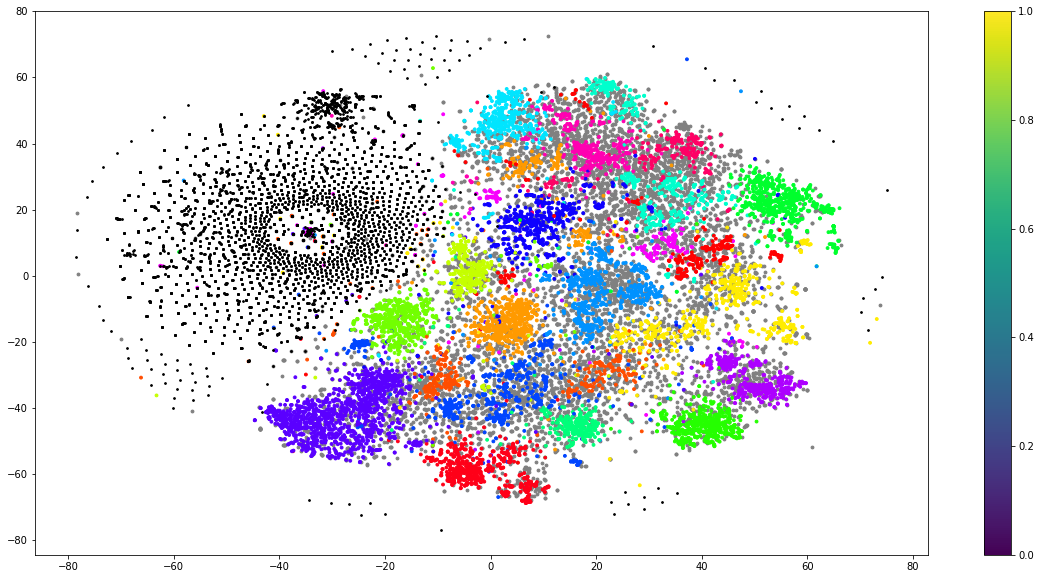

In [ ]:
visualize_tsne(documents_embeddings, labels=df.reduced.tolist(), words=token_embeddings)

In [ ]:
df.loc[df.umap_hdbscan == 2]

index  ... reduced
737     754  ...      14
803     821  ...      14
1498   1527  ...      14
2446   2498  ...      14
2621   2677  ...      14
3528   3603  ...      14
4100   4195  ...      14
5651   5772  ...      14
5705   5826  ...      14

[9 rows x 6 columns]

In [ ]:
words2

['-', '-']

In [ ]:
# Sentence embedding allenato BERT 6000 documenti

# Cerco tra tutte le parole di tutti i documenti
topic_words = []
topic_word_scores = []

for i, topic_vector in enumerate(topic_vectors_reduced):
  words_emb, words2 = encode_words(df.loc[df.umap_hdbscan == i].text.tolist())
  if len(words2) > 40:
    m = 40
  else:
    m = len(words2)
  a, h = spatial.KDTree(words_emb).query(topic_vector, k=m)
  #res = np.inner(topic_vector, words_emb)
  #top_words = np.flip(np.argsort(res, axis=0), axis=0)
  #top_scores = np.flip(np.sort(res, axis=0), axis=0)

  topic_words = ([words2[i] for i in h])
  print(topic_words)
  #topic_word_scores.append(top_scores[0:10])

  topic_words = np.array(topic_words)
  topic_word_scores = np.array(topic_word_scores)

['hi', ',']
['why', 'ken', 'of']
['h', 'l', 's', 'n', 'r', 'p', 'e', 'c', 'n', 'e', 'd', 'g', 'a', 'i', 'i', 'i', 's', 'g', '.', '.', '.', '.', '.', '.', '.', '.', '.']


ValueError: ignored

In [ ]:
# Sentence embedding non allenato bert-base-uncased 6000 documenti

# Cerco tra tutte le parole di tutti i documenti
topic_words = []
topic_word_scores = []

res = np.inner(topic_vectors_reduced, token_embeddings)
top_words = np.flip(np.argsort(res, axis=1), axis=1)
top_scores = np.flip(np.sort(res, axis=1), axis=1)

for words, scores in zip(top_words, top_scores):
    topic_words.append([vocab[i] for i in words[0:50]])
    topic_word_scores.append(scores[0:50])

topic_words = np.array(topic_words)
topic_word_scores = np.array(topic_word_scores)

df3 = pd.DataFrame(topic_words)
df3

0           1   ...            48             49
0       brexit     britain  ...  lincolnshire           plan
1       brexit     britain  ...    guaranteed       tomorrow
2      schools      school  ...       lessons      reopening
3  bureaucracy      lawyer  ...        brexit  investigation
4       brexit  charitable  ...           aid    vaccination
5       brexit   gratitude  ...        thanks   multilateral
6  coronavirus    vaccines  ...      tomorrow      ministers

[7 rows x 50 columns]

In [ ]:

a = list(dict.fromkeys(topic_words))
a = [x for x in a if len(a) > 2]
print(tokenizer.convert_ids_to_tokens(15818))

NameError: ignored

In [ ]:
# Cerco solamente tra le parole dei documenti associati al topic

for topic in df.reduced.unique():
  document_indexes = df.loc[df.reduced == topic].index.tolist()
  ids = []
  words_embedding = []
  for index in document_indexes:
    count = mask[index].sum()
    ids.append(input_ids[index, :count])
    words_embedding.append(token_embeddings[index, :count])
  ids = torch.cat(ids)
  words_embedding = torch.cat(words_embedding)

  topic_words = []
  topic_word_scores = []

  res = np.inner(topic_vectors[topic], words_embedding)
  topic_words = np.flip(np.argsort(res))
  topic_word_scores = np.flip(np.sort(res, axis=0), axis=0)

  a = []
  for i in topic_words[0:20]:
    a.append(ids[i])
  a = list(dict.fromkeys(a))
  print(tokenizer.convert_ids_to_tokens(a))

NameError: ignored

## Visualizzazione parole di un documento

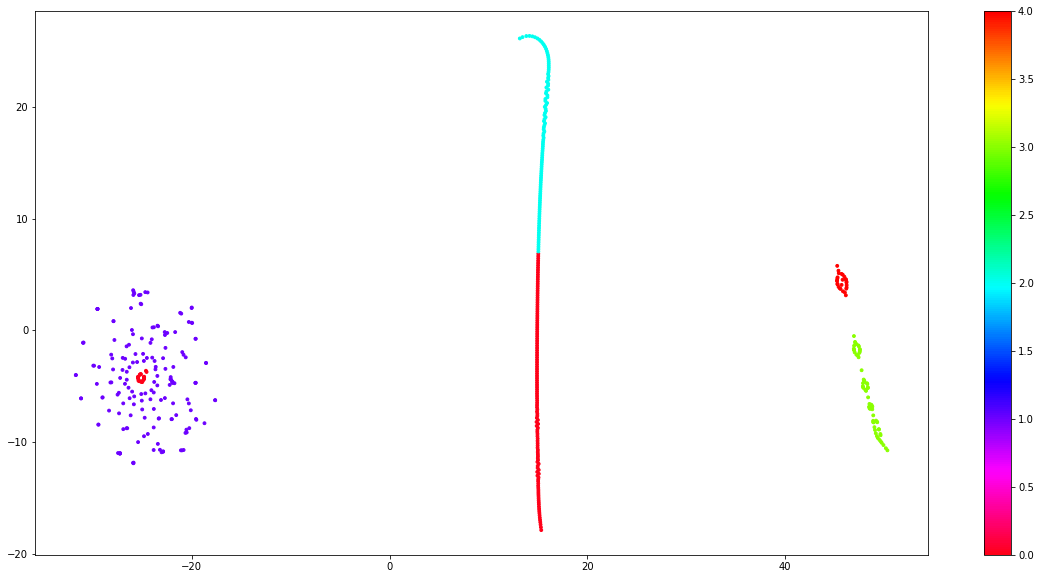

In [ ]:
umap_model = umap.UMAP(n_neighbors=15, n_components=15, metric='cosine')
documents_embedding_reduced = umap_model.fit_transform(token_embeddings[0])

kmeans = KMeans(n_clusters=5, random_state=0).fit(documents_embedding_reduced)
visualize_tsne(token_embeddings[0], kmeans.labels_)

In [ ]:
words = tokenizer.convert_ids_to_tokens(input_ids[0])
test = pd.DataFrame()
test['words'] = words
test['label'] = kmeans.labels_

In [ ]:
test[test.label==0].values.tolist()
# Vengono divise abbastanza bene le parole in parole normali, tag <pad> e stop words

In [ ]:
df

text  ...  reduced
0     \n\nI am sure some bashers of Pens fans are pr...  ...       16
1     My brother is in the market for a high-perform...  ...       88
2     \n\n\n\n\tFinally you said what you dream abou...  ...       41
3     \nThink!\n\nIt's the SCSI card doing the DMA t...  ...      103
4     1)    I have an old Jasmine drive which I cann...  ...      103
...                                                 ...  ...      ...
1995  Oakland, California, Sunday, April 25th, 1:05 ...  ...       41
1996  \n\nNo matter how "absurd" it is to suggest th...  ...      132
1997  Anyone here know if NCD is doing educational p...  ...      107
1998  \ntoo bad he doesn't bring the ability to hit,...  ...       -1
1999  I know that the placebo effect is where a pati...  ...       67

[2000 rows x 5 columns]

# Valutazione

## Coherence

Topic Coherence c_v(T) = sommatoria 𝑤1,𝑤2 (f(w1, w2))
La coherence è tra 0 e 1. Più alta è e più le parole del topic saranno coerenti tra di loro. Il valore migliore è tra 0.7 e 0.8 perchè se è più alta vuol dire che le parole del topic sono uguali
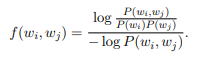

In [ ]:
import gensim.corpora as corpora
from gensim.utils import tokenize
from gensim.models import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.corpora import Dictionary

dct = Dictionary([vocab])  

cm = CoherenceModel(topics=topic_words, texts=[vocab], corpus=doc_word_counts, dictionary=dct, coherence='c_v')
coherence = cm.get_coherence() 
coherence

0.6384836561090139

In [27]:
import gensim.corpora as corpora
from gensim.utils import tokenize
from gensim.models import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.corpora import Dictionary

dct = Dictionary([vocab])  

cm = CoherenceModel(topics=topics, texts=[vocab], corpus=doc_word_counts, dictionary=dct, coherence='c_v')
coherence = cm.get_coherence() 
coherence

KeyError: ignored